In [3]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
# from scipy.signal import find_peaks

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Thu Nov  5 14:32:43 2020


### This notebook employs pandas and the pandas data structure "dataframes" to work with the csv files, primarily to simplfy the task of filtering rows, and to speed things up.

In [4]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())


# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
data2 =pd.read_csv(file2)
print(pd.read_csv(file2, nrows=5))
print(time.ctime())


# FOR READING IN CHUNKS IF FILE IS TOO LARGE TO READ AT ONCE:

# # I want to read in the file in chunks and manipulate in chunks
# # First impose the boundary conditions on each chunck
# # Then combine chunks into one df
# def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
#     """Returns DataFrame filtering values less than min or greater than max for two columns"""
#     x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
# #     GridX1maxvals = (chunk.Col > GridX1max)
#     y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
# #     GridY1maxvals = (chunk.Row > GridY1max)
#     data_chunk = data.drop(data[x_cond | y_cond].index)
#     return data_chunk

# file1_chunks = [min_max(chunk, GridX1min, GridX1max, GridY1min, GridY1max) for chunk in pd.read_csv(file1, chunksize=chunk_size)]

# grid_df1 = pd.concat(file1_chunks) # concat accepts list of df's w/common col lengths and stacks them vertically

/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv Thu Nov  5 14:32:43 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN
1   154   107  157891256832       1600            4975         NaN
2   155   106  157891257088        375            4975         NaN
3   155   107  157891257344        275            4975         NaN
4   154   105  157891257344        600            4975         NaN
Thu Nov  5 14:32:44 2020
/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv Thu Nov  5 14:32:44 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
0   154   106  157891256832       1025            4975          8         NaN
1   153    68  157891257344       1225            2750          5         NaN
2   174   107  157891257600        825            1500          3         NaN
3   184   107  157891257600       10

In [5]:
data1.shape, data2.shape

((1742891, 6), (667559, 7))

In [7]:
# # file1 ="/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
# GridX1min = 146
# GridX1max = 191
# GridY1min = 82
# GridY1max = 127

# # file1 ="/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1_cent.csv"
# GridX1min = 30
# GridX1max = 75
# GridY1min = 185
# GridY1max = 230

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
GridX1min = 67
GridX1max = 109
GridY1min = 151
GridY1max = 193

# # file2 = "/QuantumRouter/AOD8212020/AOM_64n_10kHz_ext_W0028_H07-140105-025447-1.csv"
# GridX2min = 62
# GridX2max = 107
# GridY2min = 161
# GridY2max = 206

# # file2 = "/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1.csv"
# GridX2min = 30
# GridX2max = 75
# GridY2min = 185
# GridY2max = 230

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
GridX2min = 67
GridX2max = 109
GridY2min = 151
GridY2max = 193

In [33]:
#Define column segregations

C1min = GridX1min; C1max = C1min + 5;
C2min = C1max + 1; C2max = C2min + 4;
C3min = C2max + 1; C3max = C3min + 4;
C4min = C3max + 1; C4max = C4min + 5;
C5min = C4max + 1; C5max = C5min + 5;
C6min = C5max + 1; C6max = C6min + 5;
C7min = C6max + 1; C7max = C7min + 5;
C8min = C7max + 1; C8max = C8min + 5;
C7min = C7min-3; C7max = C7max-3;
C8min = C8min-3; C8max = C8max-3; 

#Defime Row segregations

R1min = GridY1min; R1max = R1min + 5;
R2min = R1max + 1; R2max = R2min + 4;
R3min = R2max + 1; R3max = R3min + 4;
R4min = R3max + 1; R4max = R4min + 5;
R5min = R4max + 1; R5max = R5min + 5;
R6min = R5max + 1; R6max = R6min + 5;
R7min = R6max + 1; R7max = R7min + 4;
R8min = R7max + 1; R8max = R8min + 5;
R5min = R5min-3; R5max = R5max-3;
R6min = R6min-3; R6max = R6max-3;
R7min = R7min-3; R7max = R7max-3;
R8min = R8min-3; R8max = R8max-3;

In [8]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater 
    than max for two columns (in this case the '#Row' and '#Col' Columns of the Dataframe)"""
    # create the conditons that will be used to remove data coresponding to x & y locations outside the area of interest
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    # create a new df by droping the rows from the old df which meet the drop conditions (outside the x & y ranges)
    new_data = data.drop(data[x_cond | y_cond].index) # .index selects entire row, .drop() drops it in the new df
    return new_data

# Create df containing data for only the grid from file 1 based on its x and y coordinates
grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

# Create df containing data for only the grid from file 2 based on its x and y coordinates
grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
print(grid2_df.iloc[:3])

(1681028, 6) <class 'numpy.int64'> <class 'numpy.int64'> Thu Nov  5 14:38:15 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN
1   154   107  157891256832       1600            4975         NaN
2   155   106  157891257088        375            4975         NaN
(621196, 7) <class 'numpy.int64'> <class 'numpy.int64'> Thu Nov  5 14:38:15 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
0   154   106  157891256832       1025            4975          8         NaN
1   153    68  157891257344       1225            2750          5         NaN
2   174   107  157891257600        825            1500          3         NaN


In [8]:
# ToT_all_array_100 = []
# ToTtotal_all_array_100 = []
# for j in range(1,9):
#     for k in range(1,9):
#         # Create TOT arrays
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOT_array_100"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToT[arb]'].to_numpy())
# #         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
#         ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToT[arb]'].to_numpy()))
# #         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

In [9]:
# fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
#                   (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
#                   (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
#                   (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
#                   (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
#                   (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
#                   (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
#                   (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
#                  )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
# for j in range(1,9):
#     for k in range(1,9):
#             globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array_100"], bins = 100, range=(0,2500))
# #             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
#             if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
#             if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
# fig.savefig('ToT_100_1.png', bbox_inches='tight')

# 100 Grid Pulse code block

In [10]:
# plt.xlim(963691753.125-50, 963691753.125+250)
# x=(963691753.125-500000+(i*998100))

TOA_MIN = data1['#ToA'].min()

for i in range(100):
    # start at min and move window of approx 1 period in size, by approx 1 period, each loop
    ToAmin = (TOA_MIN-(500000*4096./25.))+((i*998100)*4096./25.)
    ToAmax = ToAmin+(998100*4096./25.)
    # create 100 dfs for consecutive time windows of approx 1 period
    globals()["grid1_pulse"+str(i)+"_df"] = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

    # print(grid1_pulse1_df.shape, type(grid1_pulse1_df.iloc[0,0]), grid1_pulse1_df.iloc[:1])

In [11]:
# finding peaks by finding max ToT in each peak
for i in range(100):
    # drop all ToTs < 1000 to shrink data set
    globals()["grid1_pulse"+str(i)+"_sort_df"] = \
    globals()["grid1_pulse"+str(i)+"_df"].drop(globals()["grid1_pulse"+str(i)+"_df"][globals()["grid1_pulse"+str(i)+"_df"]['#ToT[arb]'] < 1000].index)
    # Create df consisting of only the max ToTs
    globals()["grid1_pulse"+str(i)+"_max_df"] = \
    globals()["grid1_pulse"+str(i)+"_sort_df"][globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToT[arb]'] == (globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToT[arb]'].max())]
    print(globals()["grid1_pulse"+str(i)+"_max_df"].shape, globals()["grid1_pulse"+str(i)+"_max_df"].iloc[:2])
    # Remove duplicates
    if globals()["grid1_pulse"+str(i)+"_max_df"].shape[0] > 1:
        globals()["grid1_pulse"+str(i)+"_max_df"] = \
        globals()["grid1_pulse"+str(i)+"_max_df"][globals()["grid1_pulse"+str(i)+"_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToTtotal[arb]'].max())]
        print(globals()["grid1_pulse"+str(i)+"_max_df"].shape, globals()["grid1_pulse"+str(i)+"_max_df"].iloc[:2])

(1, 6)    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
1   154   107  157891256832       1600            4975         NaN
(1, 6)      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
193   154   107  158055095808       1600            5000         NaN
(1, 6)      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
383   154   107  158218934528       1575            5175         NaN
(1, 6)      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
571   154   107  158382773248       1650            5300         NaN
(1, 6)      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
759   154   107  158546612224       1675            5325         NaN
(1, 6)      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
951   154   107  158710450688       1800            5550         NaN
(1, 6)       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
1148   154   107  158874289408       1700            5400

10722   154   107  167066229504       1725            5400         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
10897   154   107  167230068480       1700            5450         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
11074   154   107  167393907456       1675            5525         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
11267   154   107  167557746176       1650            5300         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
11439   154   107  167721585152       1800            5375         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
11608   154   107  167885423616       1725            5375         NaN
(1, 6)        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
11784   154   107  168049262592       1625            5325         NaN
(1, 6)        #Col  #Row          #

In [12]:
# [print(i, globals()["grid1_pulse"+str(i)+"_max_df"]['#ToT[arb]']) \
#              for i in range(100) if globals()["grid1_pulse"+str(i)+"_max_df"]['#ToT[arb]'].to_numpy() == 2275]
# # print(MaxToTlst.max(), MaxToTlst[max(MaxToTlst)])
# # [print(MaxToTlst[i]) for i in MaxToTlst if MaxToTlst[i] == 2075]
# [print(i, globals()["grid1_pulse"+str(i)+"_max_df"]['#ToT[arb]']) \
#              for i in range(100) if globals()["grid1_pulse"+str(i)+"_max_df"]['#ToT[arb]'].to_numpy() == 1350]
# # print(MaxToTlst.max(), MaxToTlst[max(MaxToTlst)])
# # [print(MaxToTlst[i]) for i in MaxToTlst if MaxToTlst[i] == 2075]

In [13]:
# print(globals()['grid1_pulse'+str(0)+'_df']['#ToA'].iloc[10]/4096.*25.,globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].max()/4096.*25.)

In [14]:
# offset = (globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].max()/4096.*25.)
# print(offset, type(offset), type(globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].max()/4096.*25.))

In [15]:
# 963691762.5-(963691753.125), (globals()['grid1_pulse'+str(0)+'_df']['#ToA'].iloc[10]/4096.*25.)-(offset-50)

In [16]:
# globals()['grid1_pulse'+str(0)+'_df']['#ToA'] = \
#     (globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.)-((offset)-50)
# # print(globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.)

In [17]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(globals()['grid1_pulse'+str(0)+'_df']['#ToA'])

## Subtracting offset

In [18]:
# Here we subtract the offset by subtracting 50ns from the ToA corresponding to the max ToT.
# We use this ToA because the max ToT is usually one of the earlist points in the cluster because of the time-walk structure
# Therefore, we take it to be an approximation of the minimum 
for i in range(100):
    globals()['grid1_pulse'+str(i)+'_df']['#ToA'] = \
    (globals()['grid1_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

In [627]:

# for i in range(100):
#     globals()['grid1_pulse'+str(i)+'_df']['#ToA'] = (globals()['grid1_pulse'+str(i)+'_df']['#ToA'])/(globals()['grid1_pulse'+str(i)+'_df']['#ToA'].max()/250)
#     globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'] = (globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'])/(globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'].max()/1500)

In [628]:
# globals()['grid1_pulse'+str(56)+'_df']['#ToA'].max(), globals()['grid1_pulse'+str(79)+'_df']['#ToT[arb]'].max()

In [642]:
# Make 100 plots from the 100 dfs
# from matplotlib import ticker
for i in range(100):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
    h = ax0.hist2d(globals()['grid1_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_pulse'+str(i)+'_df']['#ToA'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   norm = mpl.colors.Normalize(vmin=0,vmax=250))
    cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
    cbar1.set_label('Weighted ToA (Events*ns)', fontsize=14)
    ax0.set_xlabel('Row (Pixels)', fontsize=14)
    ax0.set_ylabel('Col (Pixels)', fontsize=14)
    ax0.set_title('ToA', fontsize=17)

    h = ax1.hist2d(globals()['grid1_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   norm = mpl.colors.Normalize(vmin=0,vmax=1600))
    cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
    cbar2.set_label('Weighted ToT (Events*ns)', fontsize=14)
    ax1.set_xlabel('Row (Pixels)', fontsize=14)
    ax1.set_ylabel('Col (Pixels)', fontsize=14)
    ax1.set_title('ToT', fontsize=17)
    fig.tight_layout()

    fig.savefig('gridtoatot_frame'+str(i)+'.png', bbox_inches='tight')
    plt.close()
    fig.clf()
plt.show()

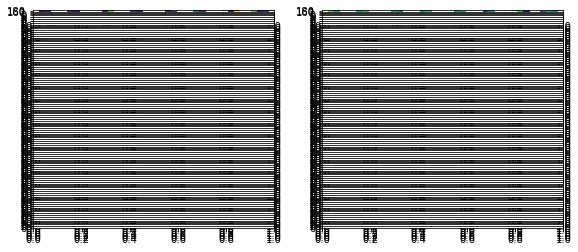

KeyboardInterrupt: 

In [51]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9), (ax10, ax11), (ax12, ax13), (ax14, ax15), (ax16, ax17), (ax18, ax19),  

(ax20, ax21), (ax22, ax23), (ax24, ax25), (ax26, ax27), (ax28, ax29), (ax30, ax31), (ax32, ax33), (ax34, ax35), (ax36, ax37), 

(ax38, ax39), (ax40, ax41), (ax42, ax43), (ax44, ax45), (ax46, ax47), (ax48, ax49), (ax50, ax51), (ax52, ax53), (ax54, ax55), 

(ax56, ax57), (ax58, ax59), (ax60, ax61), (ax62, ax63), (ax64, ax65), (ax66, ax67), (ax68, ax69), (ax70, ax71), (ax72, ax73), 

(ax74, ax75), (ax76, ax77), (ax78, ax79), (ax80, ax81), (ax82, ax83), (ax84, ax85), (ax86, ax87), (ax88, ax89), (ax90, ax91),  

(ax92, ax93), (ax94, ax95), (ax96, ax97), (ax98, ax99), (ax100, ax101), (ax102, ax103), (ax104, ax105), (ax106, ax107), (ax108, ax109),  

(ax110, ax111), (ax112, ax113), (ax114, ax115), (ax116, ax117), (ax118, ax119), (ax120, ax121), (ax122, ax123), (ax124, ax125), (ax126, ax127), 

(ax128, ax129), (ax130, ax131), (ax132, ax133), (ax134, ax135), (ax136, ax137), (ax138, ax139), (ax140, ax141), (ax142, ax143), (ax144, ax145),  

(ax146, ax147), (ax148, ax149), (ax150, ax151), (ax152, ax153), (ax154, ax155), (ax156, ax157), (ax158, ax159), (ax160, ax161), (ax162, ax163), 

(ax164, ax165), (ax166, ax167), (ax168, ax169), (ax170, ax171), (ax172, ax173), (ax174, ax175), (ax176, ax177), (ax178, ax179), (ax180, ax181),  

(ax182, ax183), (ax184, ax185), (ax186, ax187), (ax188, ax189), (ax190, ax191), (ax192, ax193), (ax194, ax195), (ax196, ax197), (ax198, ax199),  
             )= plt.subplots(nrows=100, ncols=2, figsize=(9.5, 4), facecolor='w')

count=0
for i in range(0,200,2):
    h = globals()['ax'+str(i)].hist2d(globals()['grid1_pulse'+str(count)+'_df']['#Row'], globals()['grid1_pulse'+str(count)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(count)+'_df']['#ToA'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
    fig.colorbar(h[3], ax = globals()['ax'+str(i)])

    h = globals()['ax'+str(i+1)].hist2d(globals()['grid1_pulse'+str(count)+'_df']['#Row'], globals()['grid1_pulse'+str(count)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(count)+'_df']['#ToT[arb]'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
    fig.colorbar(h[3], ax = globals()['ax'+str(i+1)])
#     fig.tight_layout()
    plt.show()
    fig.savefig('gridtoatot_frame'+str(count)+'.png', bbox_inches='tight')
    plt.close()
    count=count+1

In [24]:
# count=1
for i in range(0,200,2):
    print("(ax"+str(i)+", ax"+str(i+1)+"),", end=" ")
    if (i !=0) & (i%9 == 0):
        print("\ \n")
#     count=count+1

(ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9), (ax10, ax11), (ax12, ax13), (ax14, ax15), (ax16, ax17), (ax18, ax19), \ 

(ax20, ax21), (ax22, ax23), (ax24, ax25), (ax26, ax27), (ax28, ax29), (ax30, ax31), (ax32, ax33), (ax34, ax35), (ax36, ax37), \ 

(ax38, ax39), (ax40, ax41), (ax42, ax43), (ax44, ax45), (ax46, ax47), (ax48, ax49), (ax50, ax51), (ax52, ax53), (ax54, ax55), \ 

(ax56, ax57), (ax58, ax59), (ax60, ax61), (ax62, ax63), (ax64, ax65), (ax66, ax67), (ax68, ax69), (ax70, ax71), (ax72, ax73), \ 

(ax74, ax75), (ax76, ax77), (ax78, ax79), (ax80, ax81), (ax82, ax83), (ax84, ax85), (ax86, ax87), (ax88, ax89), (ax90, ax91), \ 

(ax92, ax93), (ax94, ax95), (ax96, ax97), (ax98, ax99), (ax100, ax101), (ax102, ax103), (ax104, ax105), (ax106, ax107), (ax108, ax109), \ 

(ax110, ax111), (ax112, ax113), (ax114, ax115), (ax116, ax117), (ax118, ax119), (ax120, ax121), (ax122, ax123), (ax124, ax125), (ax126, ax127), \ 

(ax128, ax129), (ax130, ax131), (ax132, ax133), (ax134, ax

# single pulse grid plots

Max ToT for pulse: 1350


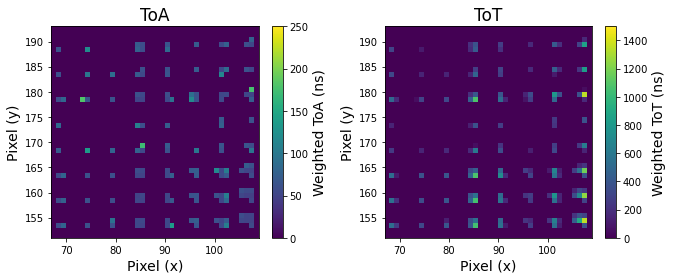

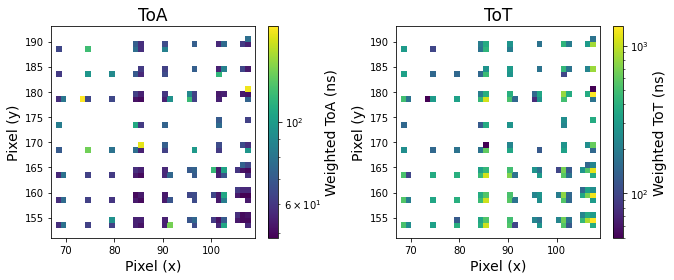

In [666]:
# vmin=(TOA_MIN-(125*4096./25.)+(0*998100)*4096./25.), vmax=((TOA_MIN+(250*4096./25.))+(0*998100)*4096./25.)
# from matplotlib import ticker
# for i in range(100):
print('Max ToT for pulse:',globals()['grid1_pulse'+str(99)+'_df']['#ToT[arb]'].max())
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
h = ax0.hist2d(globals()['grid1_pulse'+str(99)+'_df']['#Row'], 
               globals()['grid1_pulse'+str(99)+'_df']['#Col'], 
               weights=globals()['grid1_pulse'+str(99)+'_df']['#ToA'], 
               bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)],
               norm = mpl.colors.Normalize(vmin=0,vmax=250))
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(globals()['grid1_pulse'+str(99)+'_df']['#Row'], 
               globals()['grid1_pulse'+str(99)+'_df']['#Col'], 
               weights=globals()['grid1_pulse'+str(99)+'_df']['#ToT[arb]'], 
               bins = GridX1max-GridX1min, 
               range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
               norm = mpl.colors.Normalize(vmin=0,vmax=1500))
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
h = ax0.hist2d(globals()['grid1_pulse'+str(99)+'_df']['#Row'], globals()['grid1_pulse'+str(99)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(99)+'_df']['#ToA'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(globals()['grid1_pulse'+str(99)+'_df']['#Row'], globals()['grid1_pulse'+str(99)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(99)+'_df']['#ToT[arb]'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

#     fig.savefig('gridtoatot_frame'+str(99)+'.png', bbox_inches='tight')
#     plt.close()
#     fig.clf()
plt.show()

Max ToT for pulse: 2275


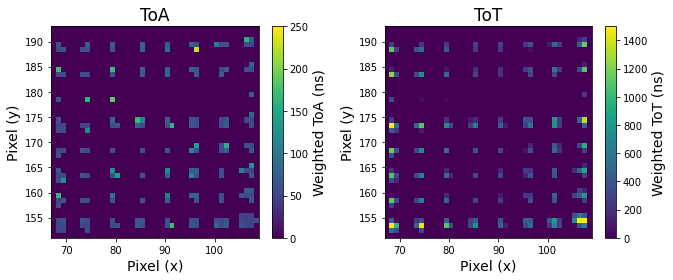

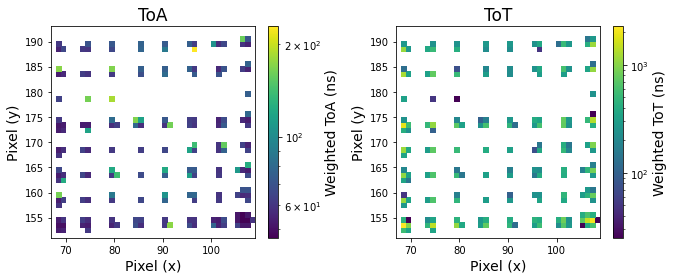

In [663]:
print('Max ToT for pulse:',globals()['grid1_pulse'+str(25)+'_df']['#ToT[arb]'].max())
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
h = ax0.hist2d(globals()['grid1_pulse'+str(25)+'_df']['#Row'], 
               globals()['grid1_pulse'+str(25)+'_df']['#Col'], 
               weights=globals()['grid1_pulse'+str(25)+'_df']['#ToA'], 
               bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)],
               norm = mpl.colors.Normalize(vmin=0,vmax=250))
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(globals()['grid1_pulse'+str(25)+'_df']['#Row'], 
               globals()['grid1_pulse'+str(25)+'_df']['#Col'], 
               weights=globals()['grid1_pulse'+str(25)+'_df']['#ToT[arb]'], 
               bins = GridX1max-GridX1min, 
               range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
               norm = mpl.colors.Normalize(vmin=0,vmax=1500))
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
h = ax0.hist2d(globals()['grid1_pulse'+str(25)+'_df']['#Row'], globals()['grid1_pulse'+str(25)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(25)+'_df']['#ToA'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(globals()['grid1_pulse'+str(25)+'_df']['#Row'], globals()['grid1_pulse'+str(25)+'_df']['#Col'], weights=globals()['grid1_pulse'+str(25)+'_df']['#ToT[arb]'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

#     fig.savefig('gridtoatot_frame'+str(25)+'.png', bbox_inches='tight')
#     plt.close()
#     fig.clf()
plt.show()

In [300]:
963691753.125-125, 963691753.125+250, (6750+1.5789125e11), (7050+1.5789125e11)

(963691628.125, 963692003.125, 157891256750.0, 157891257050.0)

# ToTvsToA plots

'Wed Oct 21 15:02:29 2020'

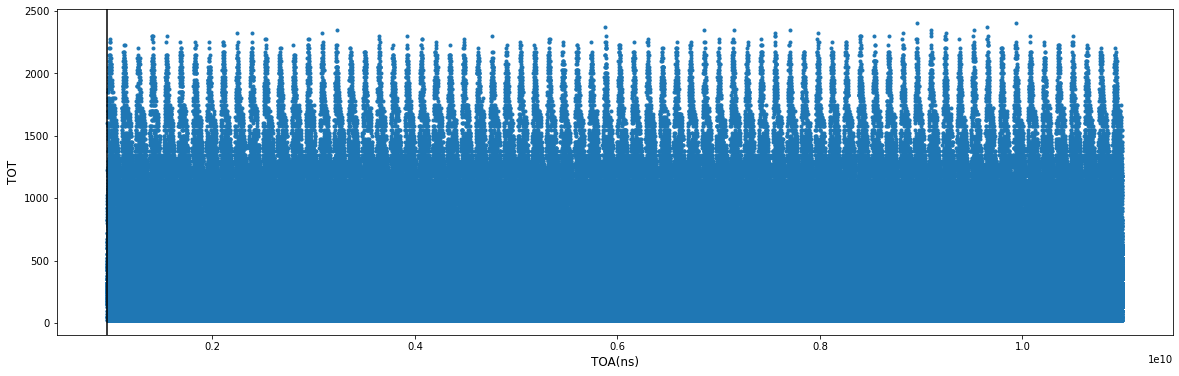

In [307]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(1e9, 1.03e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Fri Oct 23 14:41:30 2020'

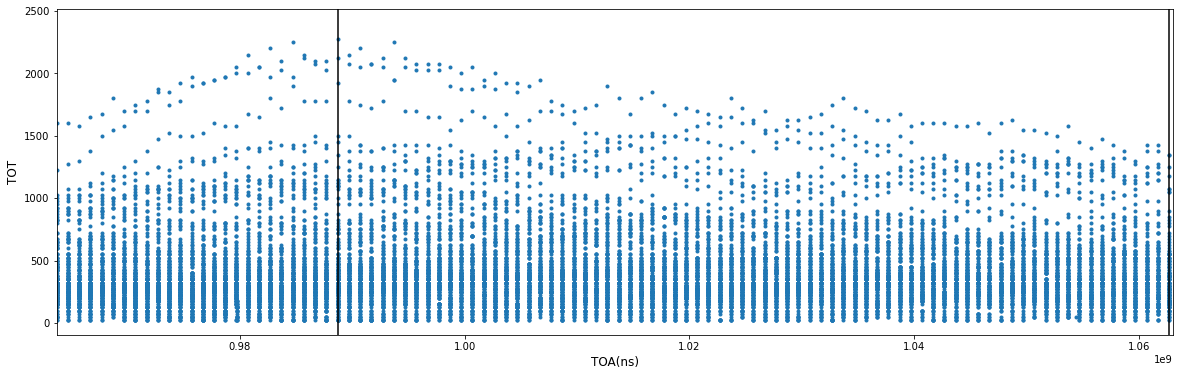

In [741]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# for i in range(200):
# plt.axvline(x=(963691753.125-500000+(200*998100)), ymin=0, ymax=2500, color='k')
plt.axvline(x=(globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
plt.axvline(x=(globals()["grid1_pulse"+str(25)+"_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axhline(y=1000, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(globals()["grid1_pulse"+str(25)+"_max_df"]['#ToA'].max()/4096.*25.-500000, \
#          globals()["grid1_pulse"+str(25)+"_max_df"]['#ToA'].max()/4096.*25.+500000)
# plt.xlim(0.9886915e9, 0.9886918e9)
# plt.xlim(4.45e9, 4.6e9)
plt.xlim(TOA_MIN/4096.*25., (TOA_MIN/4096.*25.)-500000+(100*998100))
# plt.xticks(list(plt.xticks()[0]) + [(globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.),\
#             (globals()["grid1_pulse"+str(25)+"_max_df"]['#ToA'].max()/4096.*25.)], \
#            list(plt.xticks()[1]) +['Min', 'Max'])
# ax = lines[0].axes
# lim = ax.get_xlim()
# ax.set_xticks(list(ax.get_xticks()[0]) + [(globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.), \
#                                                       (globals()["grid1_pulse"+str(25)+"_max_df"]['#ToA'].max()/4096.*25.)],\
#              list(ax.get_xticks()[0]) + ['Min', 'Max'])
# ax.set_xlim(lim)
# plt.xlim((globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.)-1000,\
#          (globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.)+1000)
# plt.xlim(1e9, 1.03e9)
# plt.savefig('fullgrid_100_data_range_TOTvsTOA_1012020_114131-1.png', bbox_inches='tight', facecolor='w')
time.ctime()

'Mon Oct 19 17:41:25 2020'

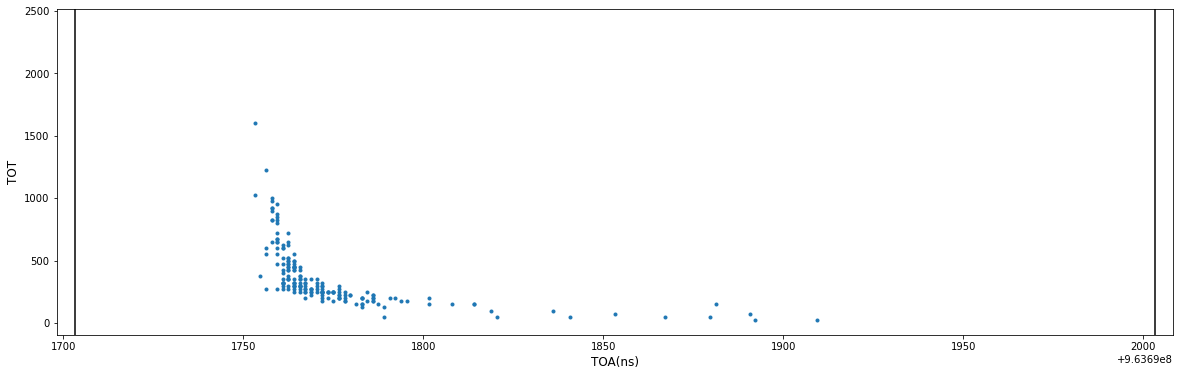

In [66]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(10000):
    plt.axvline(x=(963691753.125-50+(i*1000000)), ymin=0, ymax=2500, color='k')
    plt.axvline(x=(963691753.125+250+(i*1000000)), ymin=0, ymax=2500, color='k')
plt.xlim(963691753.125-55, 963691753.125+255)
# plt.xlim(1e9, 1.03e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Thu Oct 22 16:03:02 2020'

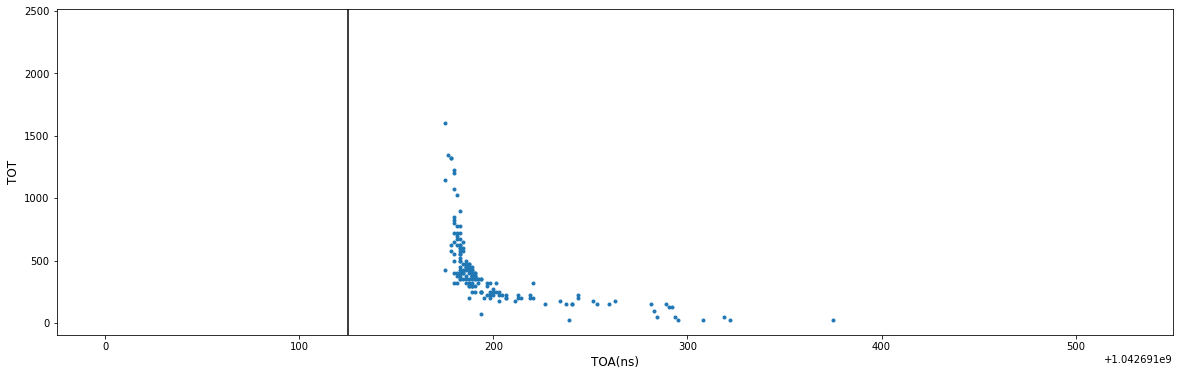

In [641]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
# x = data1['#ToA']/4096.*25.
# peaks, _ = find_peaks(x, prominence=1)
# toaconv = data1['#ToA']/4096.*25.
# peaks, _ = find_peaks(toaconv, height=2000, distance=1000000)
# peaks2, _ = find_peaks(x, prominence=1)      # BEST!
# peaks3, _ = find_peaks(x, width=20)
# peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless
# plt.subplot(2, 2, 1)

# plt.plot(peaks, toaconv[peaks], "xr")
# plt.subplot(2, 2, 2)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
# plt.plot(peaks, x[peaks], "x")
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(100):
#     plt.axvline(x=(963691753.125-500000+(i*998100)), ymin=0, ymax=2500, color='k')
#     plt.axvline(x=(963691753.125-50+(i*10018926801.5625)), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((globals()["grid1_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50), ymin=0, ymax=2500, color='k')
#     plt.axvline(x=(963691753.125+500000+(i*998100)), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-1000, 963691753.125+1000)
# plt.xlim(1.031e9+690500, 1.031e9+695000)
# plt.xlim(963691753.125-600000, 963691753.125+500500)
# plt.xlim(10.98161e9, data1['#ToA'].max()/4096.*25.-998100)(globals()["grid1_pulse"+str(99)+"_max_df"]['#ToA'].max()/4096.*25.)+80
plt.xlim((globals()["grid1_pulse"+str(79)+"_max_df"]['#ToA'].max()/4096.*25.)-200, (globals()["grid1_pulse"+str(79)+"_max_df"]['#ToA'].max()/4096.*25.)+375)
# plt.xlim(7.175e9,7.2e9)0.965e9
# plt.xlim(3.9956e9,3.996e9)
# plt.xlim(1e9, 1.03e9)
# 1.03e9+30000000.0
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
# for values > 1000nsToT find -50nsToA and creat small arrrays for pks then reduce to 1 then use to calulate -50 offset



In [453]:
(963691753.125-50+(10000*998100))-data1['#ToA'].max()/4096.*25., \
1000000*1000*10, data1['#ToA'].max()/4096.*25.-data1['#ToA'].min()/4096.*25., 'difference = ', 18926801.5625, \
'factor = ',(1000000/10000000000)*10018926801.5625, 10018926801.5625/10000000000,1000000*1.00189268015625

(-37926851.5625,
 10000000000,
 10018926801.5625,
 'difference = ',
 18926801.5625,
 'factor = ',
 1001892.68015625,
 1.00189268015625,
 1001892.68015625)

'Wed Oct 21 19:12:06 2020'

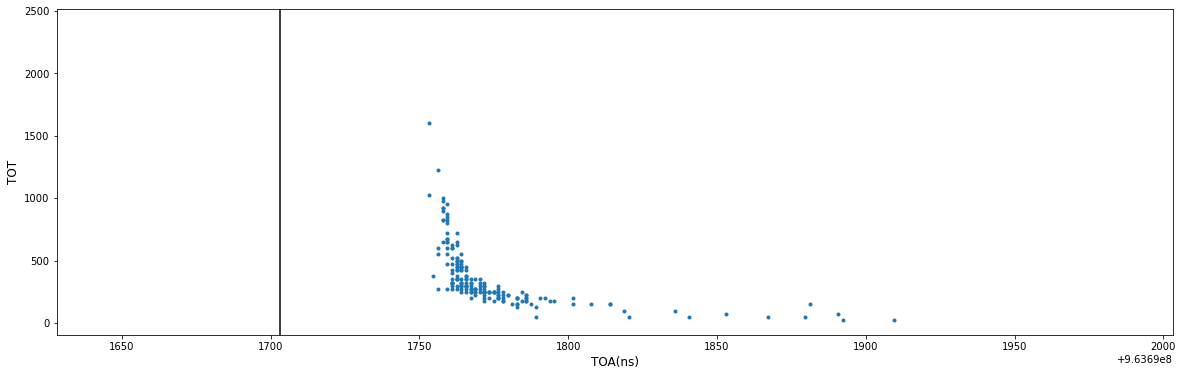

In [354]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(2):
    plt.axvline(x=(963691753.125-500000+(i*998100)), ymin=0, ymax=2500, color='k')
#     plt.axvline(x=(963691753.125-1000+(i*1000000)), ymin=0, ymax=2500, color='k')
#     plt.axvline(x=(963691753.125+1250+(i*1000000)), ymin=0, ymax=2500, color='k')
plt.xlim(963691753.125-125, 963691753.125+250)
plt.axvline(x=((TOA_MIN/4096.*25.)-50), ymin=0, ymax=2500, color='k')
# plt.xlim(1.031e9+690500, 1.031e9+695000)
# 1.03e9+30000000.0
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [370]:
375/250, 1.5*1500, (TOA_MIN/4096.*25.)-375, 963691930.0-(TOA_MIN/4096.*25.)


(1.5, 2250.0, 963691378.125, 176.875)

In [364]:
TOA_MIN, TOA_MIN/4096.*25., TOA_MIN/4096.*25.-((TOA_MIN/4096.*25.)-50), 9.646917e+08, 9.646917e+08-((TOA_MIN/4096.*25.))

(157891256832, 963691753.125, 50.0, 964691700.0, 999946.875)

In [274]:

# for i in range(100):
#     globals()['grid1_pulse'+str(i)+'_df']['#ToA'] = (globals()['grid1_pulse'+str(i)+'_df']['#ToA'])/(globals()['grid1_pulse'+str(i)+'_df']['#ToA'].max()/375)
#     globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'] = (globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'])/(globals()['grid1_pulse'+str(i)+'_df']['#ToT[arb]'].max()/2250)

In [467]:
# print(globals()['grid1_pulse'+str(0)+'_df'].shape, type(globals()['grid1_pulse'+str(0)+'_df'].iloc[0,0]), type(globals()['grid1_pulse'+str(0)+'_df'].iloc[1,1]), time.ctime())
print(globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.,globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].iloc[0]/4096.*25.)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.)-(globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].iloc[0]/4096.*25.-50)


0      9.636918e+08
1      9.636918e+08
2      9.636918e+08
3      9.636918e+08
4      9.636918e+08
           ...     
178    9.636918e+08
179    9.636918e+08
180    9.636918e+08
181    9.636918e+08
189    9.636918e+08
Name: #ToA, Length: 178, dtype: float64 963691753.125


In [ ]:
# for i in range(100):
#     globals()['grid1_pulse'+str(i)+'_df']['#ToA'] = \
#     (globals()['grid1_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

In [425]:
# # globals()['grid1_pulse'+str(0)+'_df']['#ToA'] = \
# # (globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.)-((TOA_MIN/4096.*25.-50)+(0*998100))
#     globals()['grid1_pulse'+str(0)+'_df']['#ToA'] = \
#     (globals()['grid1_pulse'+str(0)+'_df']['#ToA']/4096.*25.)-(globals()["grid1_pulse"+str(0)+"_max_df"]['#ToA'].max()/4096.*25.-50)

# Oscillating section analysis

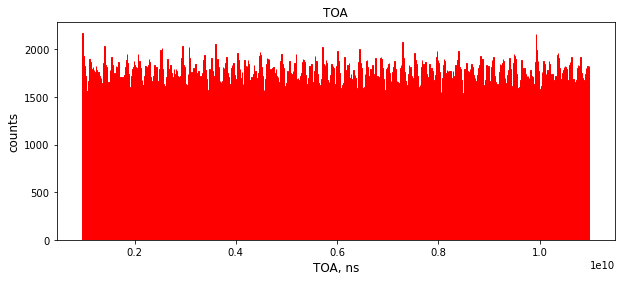

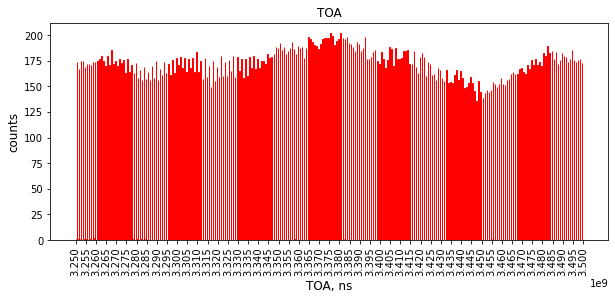

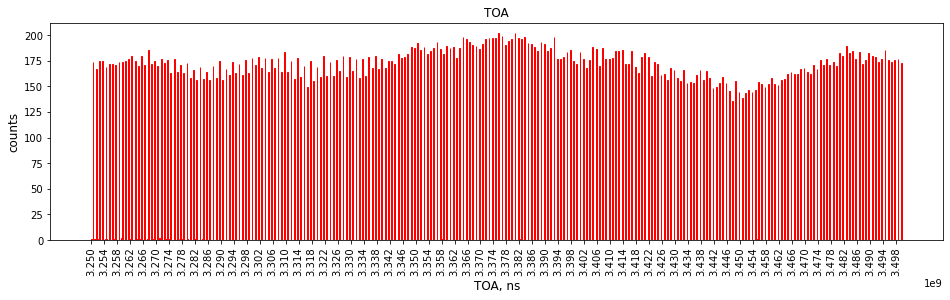

In [129]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins)
plt.show()
# # fig.savefig('TOA_256x256_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.25e9, 3.5e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::20], rotation='vertical')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.25e9, 3.5e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::16], rotation='vertical')
fig.savefig('TOA_3.25e9_3.5e9_8212020_025044-1_cent.png')
plt.show()

In [9]:
# parent df for range ToA = (3.25e9, 3.5e9)
ToAmin = (3.25e9*4096./25.)
ToAmax = (3.5e9*4096./25.)
globals()["grid1_3.25e9_3.5e9_df"] = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

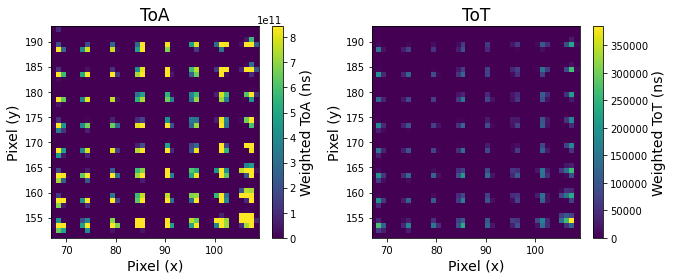

In [128]:

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
h = ax0.hist2d(globals()["grid1_3.25e9_3.5e9_df"]['#Row'], globals()["grid1_3.25e9_3.5e9_df"]['#Col'],
               weights=globals()["grid1_3.25e9_3.5e9_df"]['#ToA']/4096.*25., bins = GridX1max-GridX1min,
               range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(globals()["grid1_3.25e9_3.5e9_df"]['#Row'], globals()["grid1_3.25e9_3.5e9_df"]['#Col'],
               weights=globals()["grid1_3.25e9_3.5e9_df"]['#ToT[arb]'], bins = GridX1max-GridX1min,
               range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()
fig.savefig('fullgrid_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
plt.show()

'Fri Oct 23 15:29:45 2020'

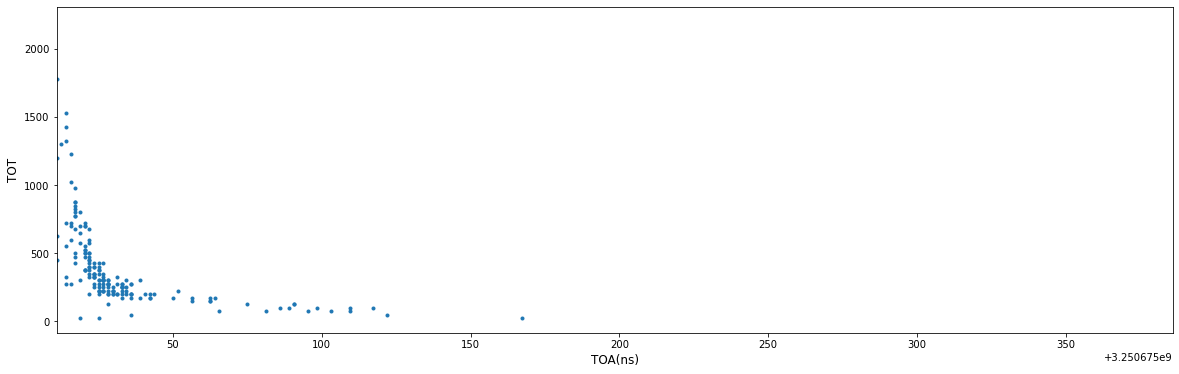

In [759]:
plt.plot(globals()["grid1_3.25e9_3.5e9_df"]['#ToA']/4096.*25.,globals()["grid1_3.25e9_3.5e9_df"]['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(globals()["grid1_3.25e9_3.5e9_df"]['#ToA'].min()/4096.*25.,\
         (globals()["grid1_3.25e9_3.5e9_df"]['#ToA'].min()/4096.*25.)+375)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [761]:
3.5e9-3.25e9

250000000.0

In [10]:
# Create pulse dfs (w/ period(998100ns) width)
for i in range(250):
    ToAmin = (globals()["grid1_3.25e9_3.5e9_df"]['#ToA'].min()-(500000*4096./25.))+((i*998100)*4096./25.)
    ToAmax = ToAmin+(998100*4096./25.)
    globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_df"]  = \
    globals()["grid1_3.25e9_3.5e9_df"].drop(globals()["grid1_3.25e9_3.5e9_df"][(globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] < ToAmin) | (globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] > ToAmax)].index)

In [11]:
# Find peaks from which to subtract offset for each peak
for i in range(250):
    globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_sort_df"] = \
    globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_df"].drop(globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_df"][globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_df"]['#ToT[arb]'] < 1000].index)
    globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"] = \
    globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_sort_df"][globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'] == (globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'].max())]
    print(globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"].iloc[:2])
    if globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"].shape[0] > 1:
        globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"] = \
        globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"][globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_sort_df"]['#ToTtotal[arb]'].max())]
        print(globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"].iloc[:2])

(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
399368   154   107  532590593792       1775            5500         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
399544   154   107  532754432512       1800            5550         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
399712   154   107  532918271488       1750            5575         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
399886   154   107  533082109952       1725            5350         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
400063   154   107  533245948928       1725            5425         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
400240   154   107  533409787904       1725            5300         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
400405   154   

(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
416642   154   107  549138312704       1850            5875         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
416826   154   107  549302151168       1950            5875         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
417024   153    68  549465990400       1950            4000         NaN
(2, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
417196   154   107  549629828864       1950            6050         NaN
417203   153    68  549629829120       1950            3975         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
417196   154   107  549629828864       1950            6050         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
417380   154   107  549793667584       2025            6400         NaN
(1, 6)         #Col  #

(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
427166   154   107  558313285376       1700            5575         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
427353   154   107  558477124608       1550            5275         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
427538   154   107  558640963328       1625            5350         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
427707   154   107  558804801792       1600            5275         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
427884   154   107  558968640768       1650            5425         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
428069   154   107  559132479488       1650            5475         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
428253   154   

436186   154   107  567488258560       1200            3475         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
436347   154   107  567652097792       1200            3525         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
436506   154   107  567815936512       1200            3500         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
436669   154   107  567979775232       1175            3550         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
436831   154   107  568143614208       1150            3450         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
436993   154   107  568307452672       1250            3600         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
437160   154   107  568471291392       1250            3800         NaN
(1, 6)         #Col  #

In [12]:
# Subtract offset
for i in range(250):
    globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#ToA'] = \
    (globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_3.25e9_3.5e9_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

In [767]:
# from matplotlib import ticker
for i in range(250):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
    h = ax0.hist2d(globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#ToA'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
    cbar1.set_label('Weighted ToA (Events*ns)', fontsize=14)
    ax0.set_xlabel('Row (Pixels)', fontsize=14)
    ax0.set_ylabel('Col (Pixels)', fontsize=14)
    ax0.set_title('ToA', fontsize=17)

    h = ax1.hist2d(globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.25e9_3.5e9_pulse'+str(i)+'_df']['#ToT[arb]'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
    cbar2.set_label('Weighted ToT (Events*ns)', fontsize=14)
    ax1.set_xlabel('Row (Pixels)', fontsize=14)
    ax1.set_ylabel('Col (Pixels)', fontsize=14)
    ax1.set_title('ToT', fontsize=17)
    fig.tight_layout()

    fig.savefig('gridtoatot_frame'+str(i)+'.png', bbox_inches='tight')
    plt.close()
    fig.clf()
plt.show()

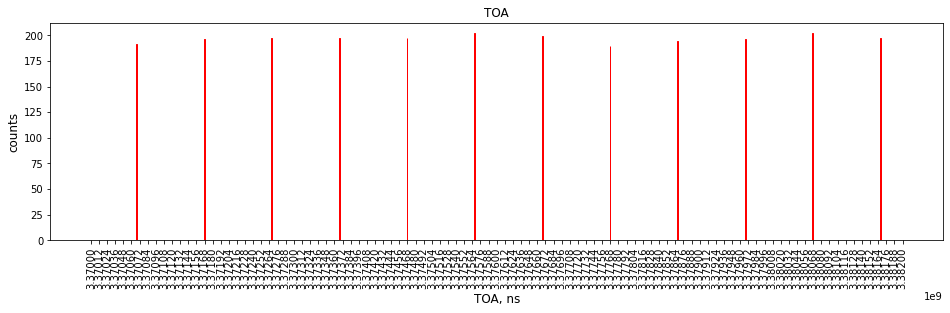

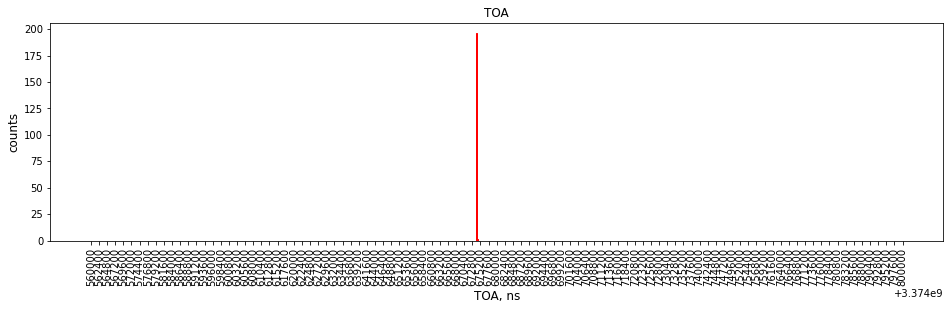

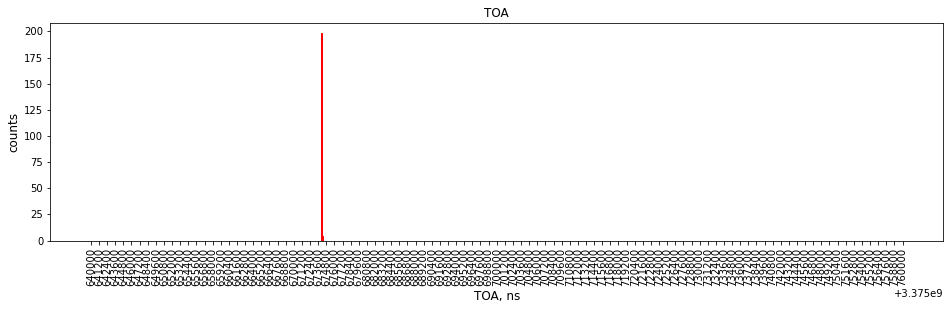

In [808]:
# Sparsely populated band
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.370e9, 3.382e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.37456e9, 3.37480e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.37564e9, 3.37576e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

In [13]:
# Create parent df for sparsely populated band (3.370e9, 3.382e9)
ToAmin = (3.370e9*4096./25.)
ToAmax = (3.382e9*4096./25.)
globals()["grid1_3.370e9_3.382e9_df"] = globals()["grid1_3.25e9_3.5e9_df"].drop(globals()["grid1_3.25e9_3.5e9_df"][(globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] < ToAmin) | (globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] > ToAmax)].index)

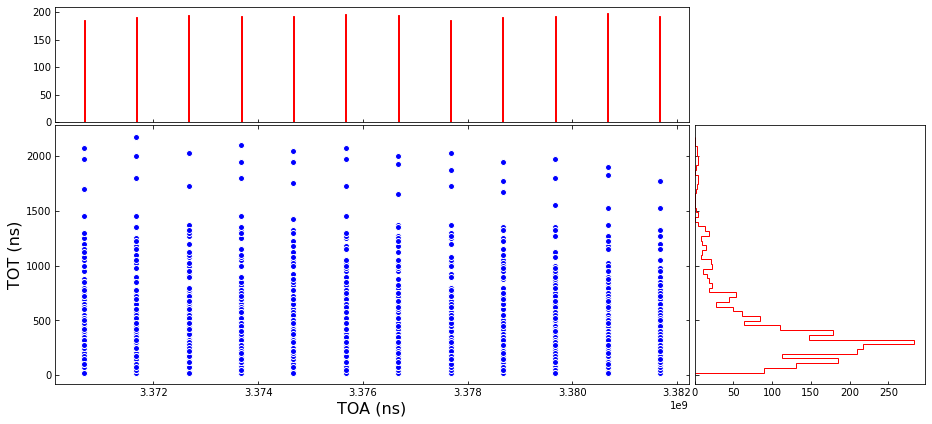

In [119]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# # the random data
# x = np.random.randn(1000)
# y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.55
bottom, height = 0.1, 0.45
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(16, 8))

ax_scatter = plt.axes(rect_scatter)
plt.xlabel('TOA (ns)',fontsize = 16)
plt.ylabel('TOT (ns)',fontsize = 16)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(globals()["grid1_3.370e9_3.382e9_df"]['#ToA']/4096.*25.,\
                   globals()["grid1_3.370e9_3.382e9_df"]['#ToT[arb]'], marker='o', color='blue', edgecolor='w')

# now determine nice limits by hand:
# binwidth = 0.25
# lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
# ax_scatter.set_xlim((-lim, lim))
# ax_scatter.set_ylim((-lim, lim))

# bins = np.arange(-lim, lim + binwidth, binwidth)
bins=1000
ax_histx.hist(globals()["grid1_3.370e9_3.382e9_df"]['#ToA']/4096.*25., bins=bins, color = 'red', ec = 'red', range = (3.370e9, 3.382e9))
ax_histy.hist(globals()["grid1_3.370e9_3.382e9_df"]['#ToT[arb]'], bins=50, lw=1, histtype='step', orientation='horizontal', color = 'red', ec = 'red')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
plt.savefig('TOT_TOA_vs_3.370e9_3.382e9_sparse.png', bbox_inches='tight',facecolor='w')
plt.show()

'Fri Oct 23 17:39:15 2020'

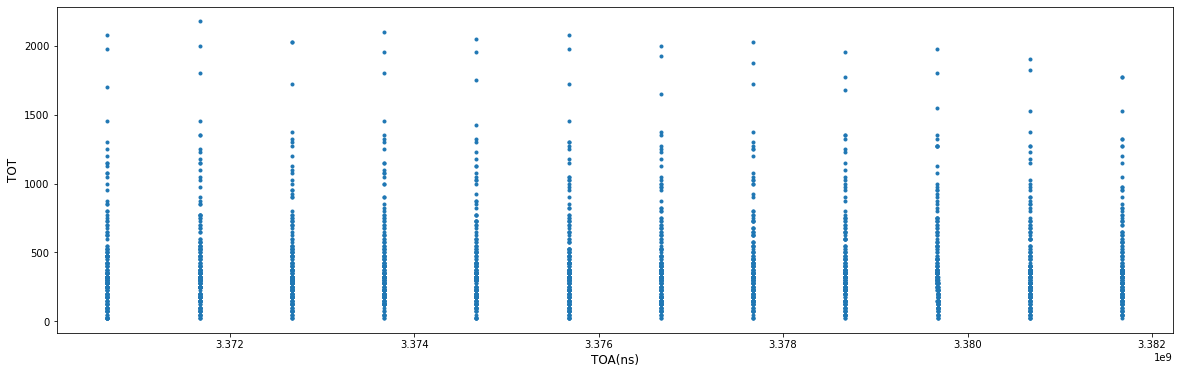

In [800]:
plt.plot(globals()["grid1_3.370e9_3.382e9_df"]['#ToA']/4096.*25.,globals()["grid1_3.370e9_3.382e9_df"]['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(globals()["grid1_3.370e9_3.382e9_df"]['#ToA'].min()/4096.*25.,\
#          (globals()["grid1_3.370e9_3.382e9_df"]['#ToA'].min()/4096.*25.)+375)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight',facecolor='w')
time.ctime()

In [14]:
# Create pulse dfs (w/ period(998100ns) width)
for i in range(12):
    ToAmin = (globals()["grid1_3.370e9_3.382e9_df"]['#ToA'].min()-(500000*4096./25.))+((i*998100)*4096./25.)
    ToAmax = ToAmin+(998100*4096./25.)
    globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_df"]  = \
    globals()["grid1_3.370e9_3.382e9_df"].drop(globals()["grid1_3.370e9_3.382e9_df"][(globals()["grid1_3.370e9_3.382e9_df"]['#ToA'] < ToAmin) | (globals()["grid1_3.370e9_3.382e9_df"]['#ToA'] > ToAmax)].index)

In [15]:
# Find peaks from which to subtract offset for each peak
for i in range(12):
    globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_sort_df"] = \
    globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_df"].drop(globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_df"][globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_df"]['#ToT[arb]'] < 1000].index)
    globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"] = \
    globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_sort_df"][globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'] == (globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'].max())]
    print(globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"].iloc[:2])
    if globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"].shape[0] > 1:
        globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"] = \
        globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"][globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_sort_df"]['#ToTtotal[arb]'].max())]
        print(globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"].iloc[:2])

(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420216   153    68  552251249920       2075            4325         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420407   153    68  552415088640       2175            4425         NaN
(2, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420596   154   107  552578926848       2025            6550         NaN
420605   153    68  552578927360       2025            4300         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420596   154   107  552578926848       2025            6550         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420800   153    68  552742766080       2100            4375         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
420997   153    68  552906604800       2050            4225         NaN
(1, 6)         #Col  #

In [803]:
# Find average distance between peaks
peaks = []
for i in range(11):
    peaks.append((globals()["grid1_3.370e9_3.382e9_pulse"+str(i+1)+"_max_df"]['#ToA'].max())-(globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"]['#ToA'].max()))
print("average distance between peaks:", (sum(peaks)/len(peaks))/4096.*25.)

average distance between peaks: 999992.6136363636


In [16]:
# Subtract offset
for i in range(12):
    globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'] = \
    (globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_3.370e9_3.382e9_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

ToA Spread for Pulse 0: 168.75 (ns)
ToT Spread for Pulse 0: 2050 (ns)


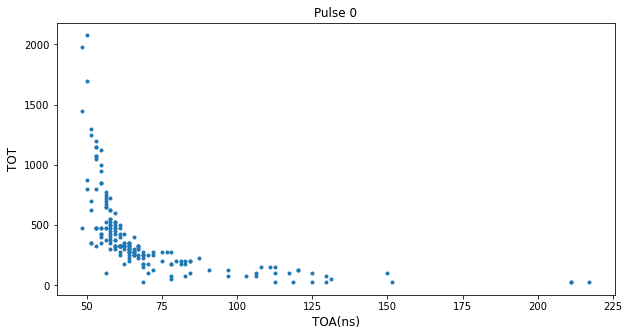

ToA Spread for Pulse 1: 157.8125 (ns)
ToT Spread for Pulse 1: 2150 (ns)


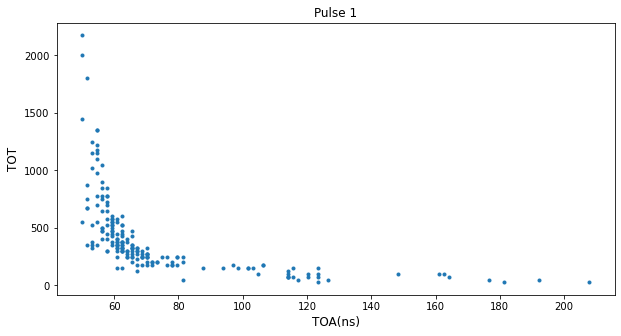

ToA Spread for Pulse 2: 129.6875 (ns)
ToT Spread for Pulse 2: 2000 (ns)


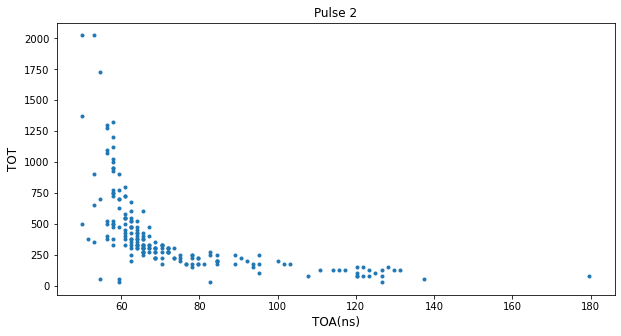

ToA Spread for Pulse 3: 125.0 (ns)
ToT Spread for Pulse 3: 2075 (ns)


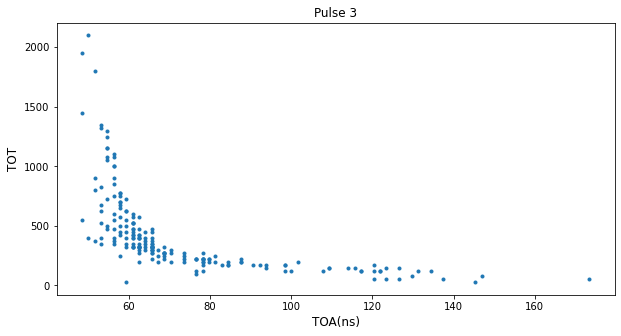

ToA Spread for Pulse 4: 143.75 (ns)
ToT Spread for Pulse 4: 2025 (ns)


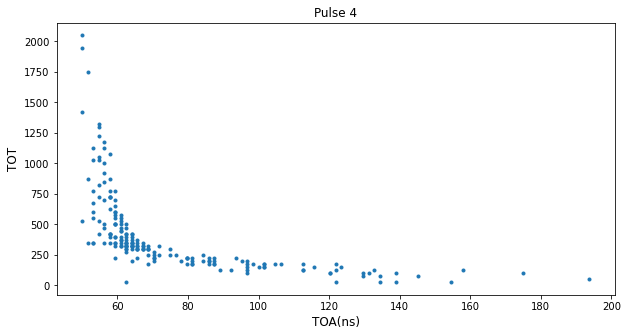

ToA Spread for Pulse 5: 151.5625 (ns)
ToT Spread for Pulse 5: 2050 (ns)


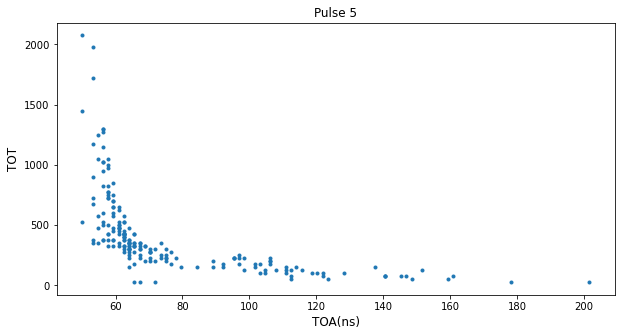

ToA Spread for Pulse 6: 110.9375 (ns)
ToT Spread for Pulse 6: 1975 (ns)


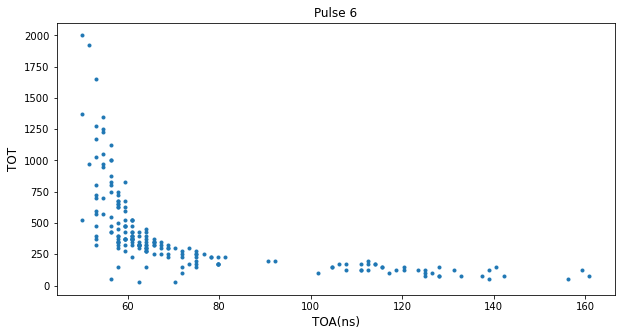

ToA Spread for Pulse 7: 132.8125 (ns)
ToT Spread for Pulse 7: 2000 (ns)


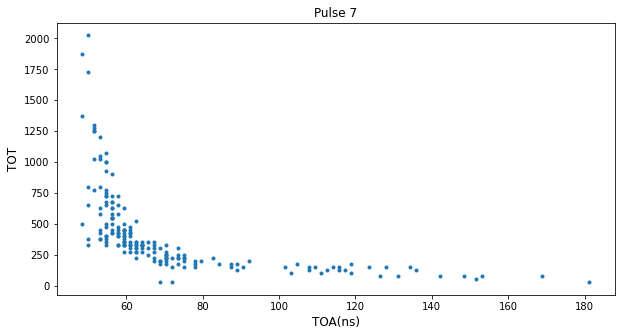

ToA Spread for Pulse 8: 140.625 (ns)
ToT Spread for Pulse 8: 1925 (ns)


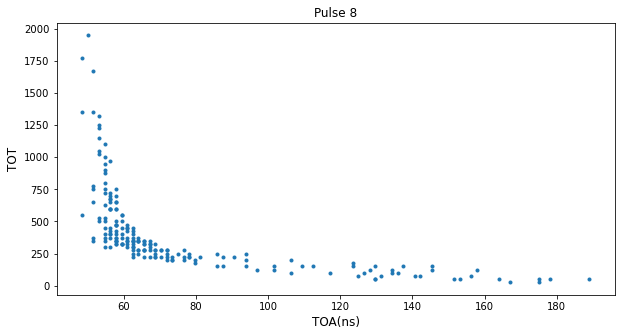

ToA Spread for Pulse 9: 153.125 (ns)
ToT Spread for Pulse 9: 1950 (ns)


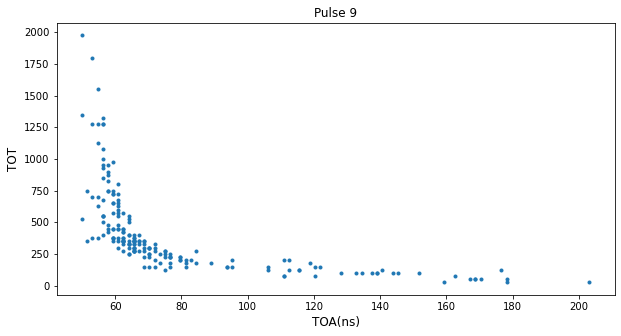

ToA Spread for Pulse 10: 145.3125 (ns)
ToT Spread for Pulse 10: 1875 (ns)


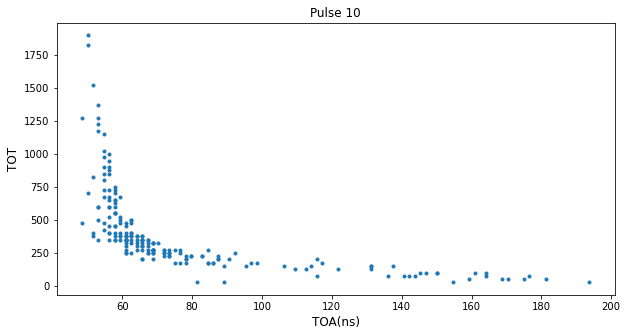

ToA Spread for Pulse 11: 154.6875 (ns)
ToT Spread for Pulse 11: 1750 (ns)


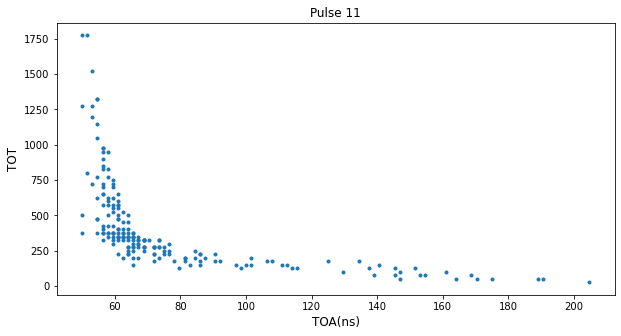

AVERAGE TOA SPREAD FOR SPARSE BAND: 142.83854166666666
AVERAGE TOT SPREAD FOR SPARSE BAND: 1985.4166666666667


'Mon Oct 26 01:01:38 2020'

In [117]:
# Sparse 1-12
# gs = mpl.gridspec.GridSpec(2, 4)
# gs.update(wspace=6)
# ax1 = plt.subplot(gs[0, :2], )
# ax2 = plt.subplot(gs[0, 2:])
# ax3 = plt.subplot(gs[1, 1:3])
# fig, ((ax0, ax1), (ax2)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), facecolor='w')
plt.rcParams["figure.figsize"] = (10,5)
ToAlistsparse=[]
ToTlistsparse=[]
for i in range(12):
    ToAlistsparse.append((globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'].max())-(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'].min()))
    ToTlistsparse.append((globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'].max())-(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'].min()))
    print("ToA Spread for Pulse "+str(i)+":",(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'].max())-(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'].min()), "(ns)")
    print("ToT Spread for Pulse "+str(i)+":",(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'].max())-(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'].min()), "(ns)")
    plt.plot(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'],globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'], '.')
    plt.title("Pulse "+str(i), fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(globals()["grid1_3.370e9_3.382e9_df"]['#ToA'].min()/4096.*25.,\
#          (globals()["grid1_3.370e9_3.382e9_df"]['#ToA'].min()/4096.*25.)+375)
    plt.show()
print("AVERAGE TOA SPREAD FOR SPARSE BAND:", sum(ToAlistsparse)/len(ToAlistsparse))
print("AVERAGE TOT SPREAD FOR SPARSE BAND:", sum(ToTlistsparse)/len(ToTlistsparse))
# plt.plot(globals()['grid1_3.370e9_3.382e9_pulse'+str(7)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.370e9_3.382e9_pulse'+str(7)+'_df']['#ToT[arb]'], '.')
# plt.title("Pulse 8", fontsize = 12) # change the title
# plt.xlabel('TOA(ns)',fontsize = 12)
# plt.ylabel('TOT',fontsize = 12)
# plt.show()
# plt.plot(globals()['grid1_3.370e9_3.382e9_pulse'+str(1)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.370e9_3.382e9_pulse'+str(1)+'_df']['#ToT[arb]'], '.')
# plt.title("Pulse 2", fontsize = 12) # change the title
# plt.xlabel('TOA(ns)',fontsize = 12)
# plt.ylabel('TOT',fontsize = 12)
# plt.show()
# ax3.plot(globals()['grid1_3.370e9_3.382e9_pulse'+str(1)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.370e9_3.382e9_pulse'+str(1)+'_df']['#ToT[arb]'], '.')
# #plt.title("TOT", fontsize = 12) # change the title
# ax3.set_xlabel('TOA(ns)',fontsize = 12)
# ax3.set_ylabel('TOT',fontsize = 12)

# fig.tight_layout()
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight',facecolor='w')
time.ctime()

In [789]:
# from matplotlib import ticker
for i in range(12):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
    h = ax0.hist2d(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToA'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
    cbar1.set_label('Weighted ToA (Events*ns)', fontsize=14)
    ax0.set_xlabel('Row (Pixels)', fontsize=14)
    ax0.set_ylabel('Col (Pixels)', fontsize=14)
    ax0.set_title('ToA', fontsize=17)

    h = ax1.hist2d(globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.370e9_3.382e9_pulse'+str(i)+'_df']['#ToT[arb]'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
    cbar2.set_label('Weighted ToT (Events*ns)', fontsize=14)
    ax1.set_xlabel('Row (Pixels)', fontsize=14)
    ax1.set_ylabel('Col (Pixels)', fontsize=14)
    ax1.set_title('ToT', fontsize=17)
    fig.tight_layout()

    fig.savefig('gridtoatot_frame'+str(i)+'.png', bbox_inches='tight')
    plt.close()
    fig.clf()
plt.show()

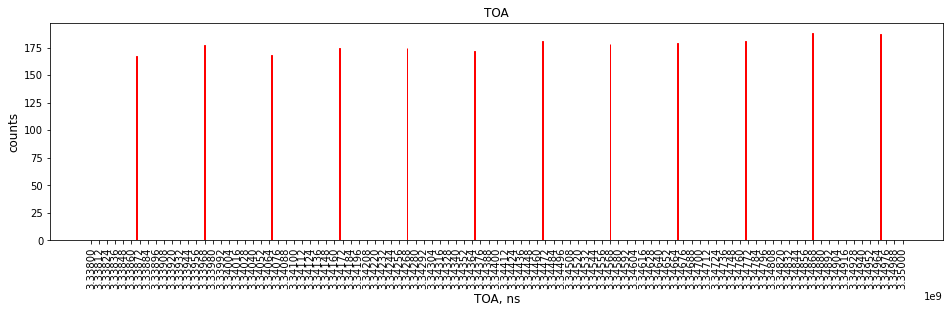

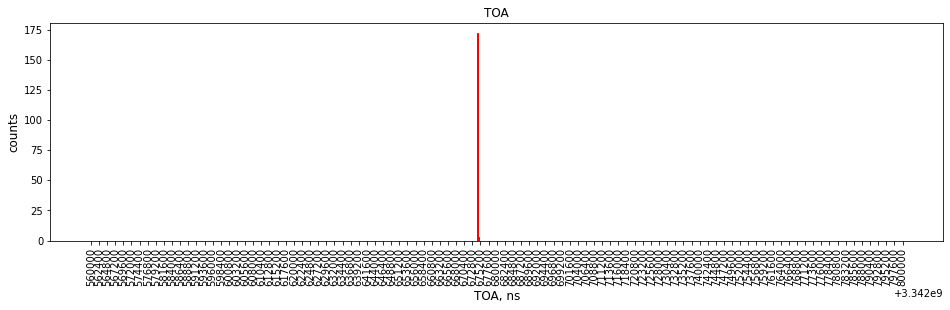

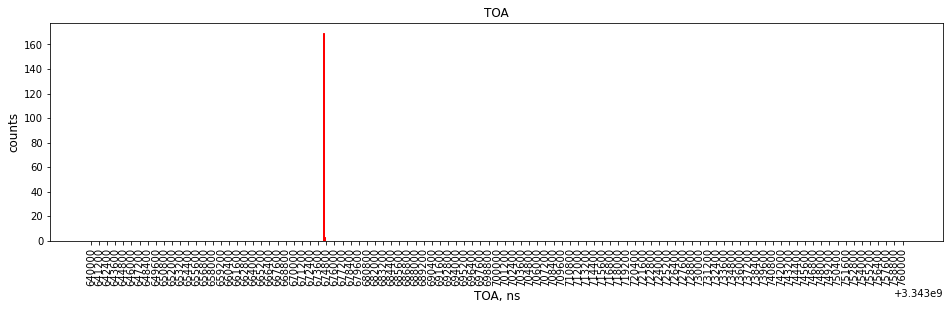

In [322]:
# Densely populated band
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.3380e9, 3.350e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.34256e9, 3.34280e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (3.34364e9, 3.34376e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::10], rotation='vertical')
plt.show()

In [27]:
# Create parent df for densely populated band (3.3380e9, 3.350e9)
ToAmin = (3.3380e9*4096./25.)
ToAmax = (3.350e9*4096./25.)
globals()["grid1_3.3380e9_3.350e9_df"] = globals()["grid1_3.25e9_3.5e9_df"].drop(globals()["grid1_3.25e9_3.5e9_df"][(globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] < ToAmin) | (globals()["grid1_3.25e9_3.5e9_df"]['#ToA'] > ToAmax)].index)

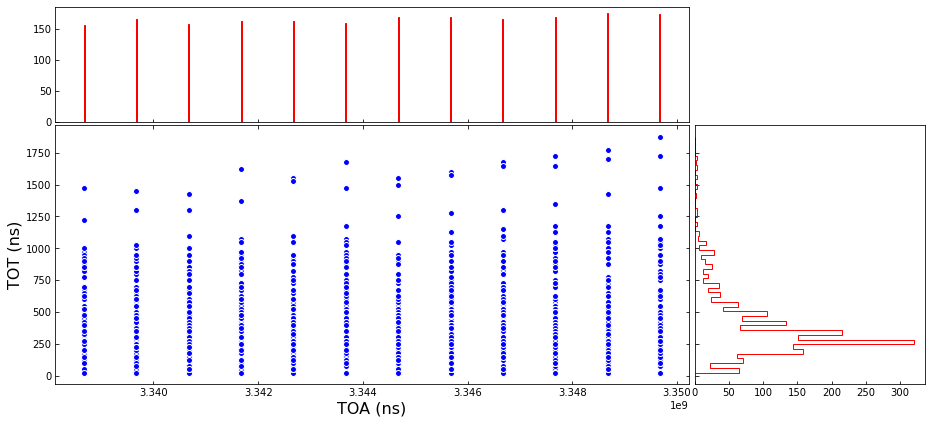

In [125]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# # the random data
# x = np.random.randn(1000)
# y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.55
bottom, height = 0.1, 0.45
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(16, 8))

ax_scatter = plt.axes(rect_scatter)
plt.xlabel('TOA (ns)',fontsize = 16)
plt.ylabel('TOT (ns)',fontsize = 16)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA']/4096.*25.,\
                   globals()["grid1_3.3380e9_3.350e9_df"]['#ToT[arb]'], marker='o', color='blue', edgecolor='w')

# now determine nice limits by hand:
# binwidth = 0.25
# lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
# ax_scatter.set_xlim((-lim, lim))
# ax_scatter.set_ylim((-lim, lim))

# bins = np.arange(-lim, lim + binwidth, binwidth)
bins=1000
ax_histx.hist(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA']/4096.*25., bins=bins, color = 'red', ec = 'red', range = (3.3380e9, 3.350e9))
ax_histy.hist(globals()["grid1_3.3380e9_3.350e9_df"]['#ToT[arb]'], bins=50, lw=1, histtype='step', orientation='horizontal', color = 'red', ec = 'red')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
plt.savefig('TOT_TOA_vs_3.3380e9_3.350e9_dense.png', bbox_inches='tight',facecolor='w')
plt.show()

'Fri Oct 23 17:39:06 2020'

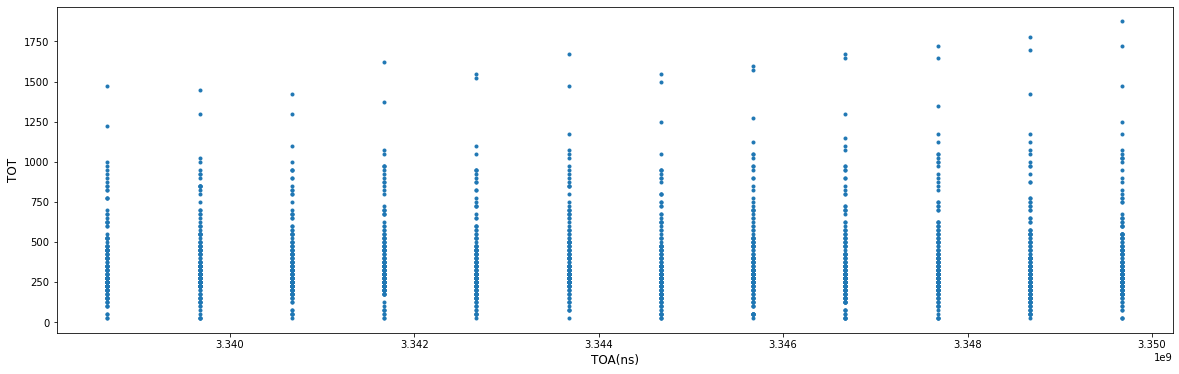

In [799]:
plt.plot(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA']/4096.*25.,globals()["grid1_3.3380e9_3.350e9_df"]['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'].min()/4096.*25.,\
#          (globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'].min()/4096.*25.)+375)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [28]:
# Create pulse dfs (w/ period(998100ns) width)
for i in range(12):
    ToAmin = (globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'].min()-(500000*4096./25.))+((i*998100)*4096./25.)
    ToAmax = ToAmin+(998100*4096./25.)
    globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_df"]  = \
    globals()["grid1_3.3380e9_3.350e9_df"].drop(globals()["grid1_3.3380e9_3.350e9_df"][(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'] < ToAmin) | (globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'] > ToAmax)].index)

In [29]:
# Find peaks from which to subtract offset for each peak
for i in range(12):
    globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_sort_df"] = \
    globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_df"].drop(globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_df"][globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_df"]['#ToT[arb]'] < 1000].index)
    globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"] = \
    globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_sort_df"][globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'] == (globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_sort_df"]['#ToT[arb]'].max())]
    print(globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"].iloc[:2])
    if globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"].shape[0] > 1:
        globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"] = \
        globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"][globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_sort_df"]['#ToTtotal[arb]'].max())]
        print(globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"].shape, globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"].iloc[:2])

(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
414322   154   107  547008408320       1475            4525         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
414488   154   107  547172247296       1450            4875         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
414666   154   107  547336086016       1425            4675         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
414833   154   107  547499924480       1625            4950         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
415008   154   107  547663763456       1550            4900         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
415183   154   107  547827602176       1675            5275         NaN
(1, 6)         #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
415355   154   

In [804]:
# Find average distance between peaks
peaks = []
for i in range(11):
    peaks.append((globals()["grid1_3.3380e9_3.350e9_pulse"+str(i+1)+"_max_df"]['#ToA'].max())-(globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"]['#ToA'].max()))
print("average distance between peaks:", (sum(peaks)/len(peaks))/4096.*25.)

average distance between peaks: 999992.7556818182


In [30]:
# Subtract offset
for i in range(12):
    globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'] = \
    (globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_3.3380e9_3.350e9_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

ToA Spread for Pulse 0: 110.9375 (ns)
ToT Spread for Pulse 0: 1450 (ns)


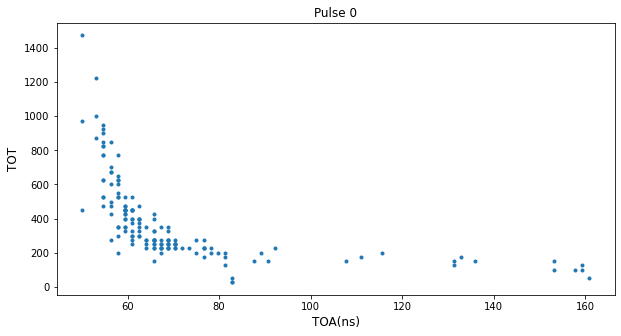

ToA Spread for Pulse 1: 193.75 (ns)
ToT Spread for Pulse 1: 1425 (ns)


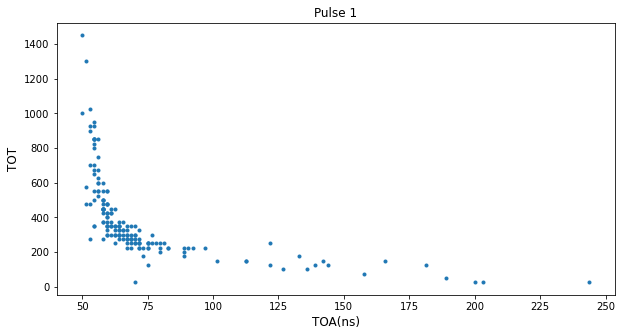

ToA Spread for Pulse 2: 153.125 (ns)
ToT Spread for Pulse 2: 1400 (ns)


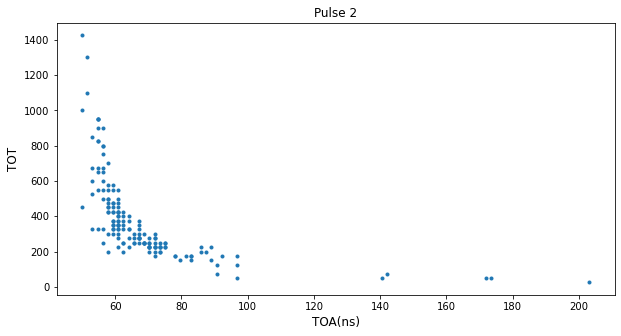

ToA Spread for Pulse 3: 165.625 (ns)
ToT Spread for Pulse 3: 1600 (ns)


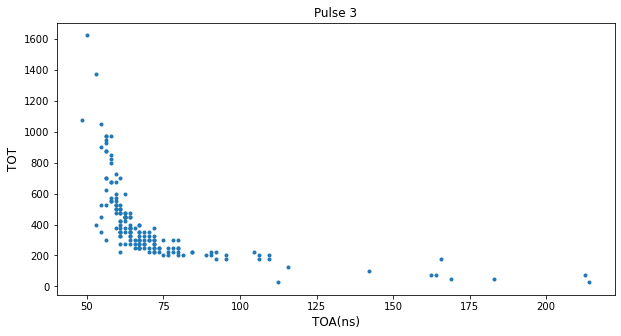

ToA Spread for Pulse 4: 165.625 (ns)
ToT Spread for Pulse 4: 1525 (ns)


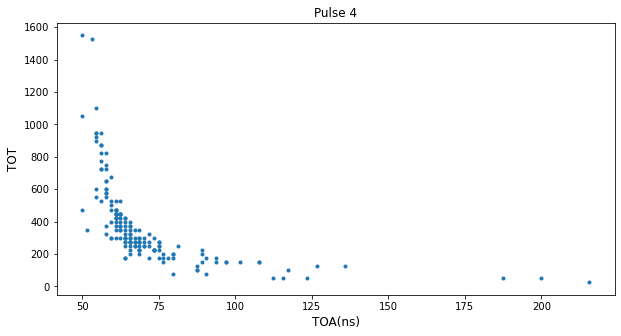

ToA Spread for Pulse 5: 132.8125 (ns)
ToT Spread for Pulse 5: 1650 (ns)


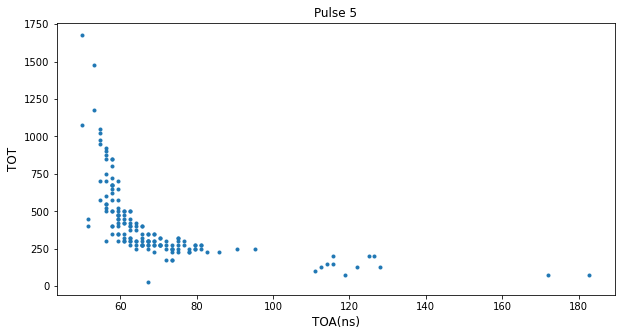

ToA Spread for Pulse 6: 84.375 (ns)
ToT Spread for Pulse 6: 1525 (ns)


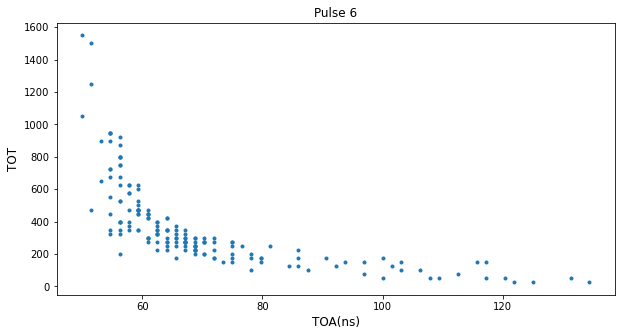

ToA Spread for Pulse 7: 167.1875 (ns)
ToT Spread for Pulse 7: 1575 (ns)


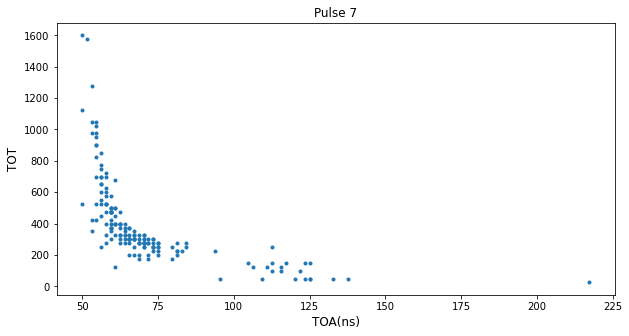

ToA Spread for Pulse 8: 92.1875 (ns)
ToT Spread for Pulse 8: 1650 (ns)


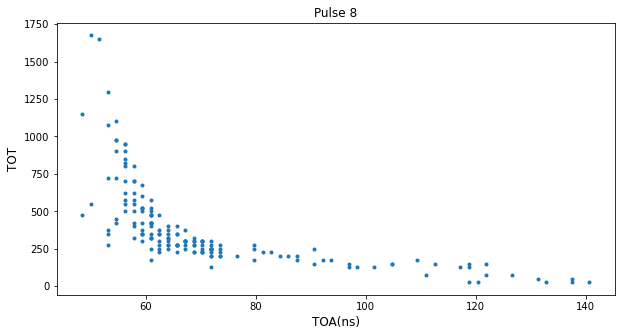

ToA Spread for Pulse 9: 123.4375 (ns)
ToT Spread for Pulse 9: 1700 (ns)


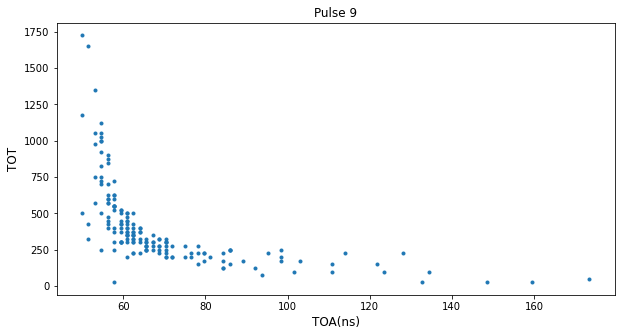

ToA Spread for Pulse 10: 115.625 (ns)
ToT Spread for Pulse 10: 1750 (ns)


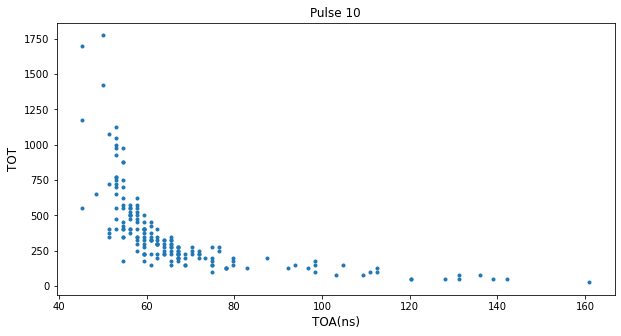

ToA Spread for Pulse 11: 107.8125 (ns)
ToT Spread for Pulse 11: 1850 (ns)


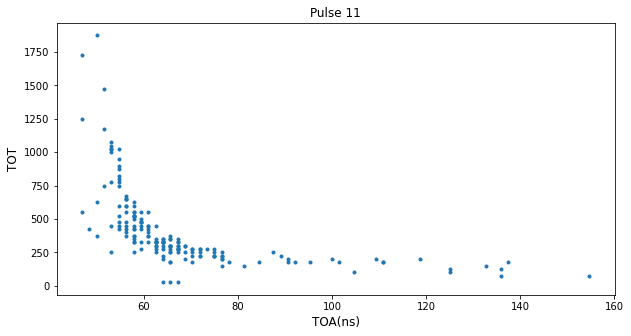

AVERAGE TOA SPREAD FOR dense BAND: 134.375
AVERAGE TOT SPREAD FOR dense BAND: 1591.6666666666667


'Mon Oct 26 11:44:28 2020'

In [130]:
#Dense 1-12
# gs = mpl.gridspec.GridSpec(2, 4)
# gs.update(wspace=6)
# ax1 = plt.subplot(gs[0, :2], )
# ax2 = plt.subplot(gs[0, 2:])
# ax3 = plt.subplot(gs[1, 1:3])
# fig, ((ax0, ax1), (ax2)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), facecolor='w')
plt.rcParams["figure.figsize"] = (10,5)
ToAlistdense=[]
ToTlistdense=[]
for i in range(12):
    ToAlistdense.append((globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'].max())-(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'].min()))
    ToTlistdense.append((globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'].max())-(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'].min()))
    print("ToA Spread for Pulse "+str(i)+":",(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'].max())-(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'].min()), "(ns)")
    print("ToT Spread for Pulse "+str(i)+":",(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'].max())-(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'].min()), "(ns)")
    plt.plot(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'],globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'], '.')
    plt.title("Pulse "+str(i), fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'].min()/4096.*25.,\
#          (globals()["grid1_3.3380e9_3.350e9_df"]['#ToA'].min()/4096.*25.)+375)
    plt.show()
print("AVERAGE TOA SPREAD FOR dense BAND:", sum(ToAlistdense)/len(ToAlistdense))
print("AVERAGE TOT SPREAD FOR dense BAND:", sum(ToTlistdense)/len(ToTlistdense))
# plt.plot(globals()['grid1_3.3380e9_3.350e9_pulse'+str(7)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.3380e9_3.350e9_pulse'+str(7)+'_df']['#ToT[arb]'], '.')
# plt.title("Pulse 8", fontsize = 12) # change the title
# plt.xlabel('TOA(ns)',fontsize = 12)
# plt.ylabel('TOT',fontsize = 12)
# plt.show()
# plt.plot(globals()['grid1_3.3380e9_3.350e9_pulse'+str(1)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.3380e9_3.350e9_pulse'+str(1)+'_df']['#ToT[arb]'], '.')
# plt.title("Pulse 2", fontsize = 12) # change the title
# plt.xlabel('TOA(ns)',fontsize = 12)
# plt.ylabel('TOT',fontsize = 12)
# plt.show()
# ax3.plot(globals()['grid1_3.3380e9_3.350e9_pulse'+str(1)+'_df']['#ToA']/4096.*25.,globals()['grid1_3.3380e9_3.350e9_pulse'+str(1)+'_df']['#ToT[arb]'], '.')
# #plt.title("TOT", fontsize = 12) # change the title
# ax3.set_xlabel('TOA(ns)',fontsize = 12)
# ax3.set_ylabel('TOT',fontsize = 12)

# fig.tight_layout()
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight',facecolor='w')
time.ctime()

In [795]:
# from matplotlib import ticker
for i in range(12):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
    h = ax0.hist2d(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToA'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
    cbar1.set_label('Weighted ToA (Events*ns)', fontsize=14)
    ax0.set_xlabel('Row (Pixels)', fontsize=14)
    ax0.set_ylabel('Col (Pixels)', fontsize=14)
    ax0.set_title('ToA', fontsize=17)

    h = ax1.hist2d(globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#Row'], 
                   globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#Col'], 
                   weights=globals()['grid1_3.3380e9_3.350e9_pulse'+str(i)+'_df']['#ToT[arb]'], 
                   bins = GridX1max-GridX1min, 
                   range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], 
                   )
    cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
    cbar2.set_label('Weighted ToT (Events*ns)', fontsize=14)
    ax1.set_xlabel('Row (Pixels)', fontsize=14)
    ax1.set_ylabel('Col (Pixels)', fontsize=14)
    ax1.set_title('ToT', fontsize=17)
    fig.tight_layout()

    fig.savefig('gridtoatot_frame'+str(i)+'.png', bbox_inches='tight')
    plt.close()
    fig.clf()
plt.show()

In [ ]:
3.37456, 3.37480 3.37564, 3.37576  3.34256, 3.34280   3.34364, 3.34376

In [17]:
globals()["grid1_3.35e9_3.40e9_df"] = \
    globals()["grid1_3.25e9_3.5e9_df"].drop(globals()["grid1_3.25e9_3.5e9_df"][(globals()["grid1_3.25e9_3.5e9_df"]['#ToA']<(3.35e9*4096./25.)) | (globals()["grid1_3.25e9_3.5e9_df"]['#ToA']>(3.40e9*4096./25.))].index)
globals()["grid1_3.35e9_3.40e9_max_df"] = \
    globals()["grid1_3.35e9_3.40e9_df"][globals()["grid1_3.35e9_3.40e9_df"]['#ToT[arb]'] == (globals()["grid1_3.35e9_3.40e9_df"]['#ToT[arb]'].max())]
print(globals()["grid1_3.35e9_3.40e9_max_df"].shape)
if (globals()["grid1_3.35e9_3.40e9_max_df"].shape[0] >1):
    globals()["grid1_3.35e9_3.40e9_max_df"] = \
    globals()["grid1_3.35e9_3.40e9_max_df"][globals()["grid1_3.35e9_3.40e9_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_3.35e9_3.40e9_max_df"]['#ToTtotal[arb]'].max())]
print(globals()["grid1_3.35e9_3.40e9_max_df"].shape)

globals()["grid1_3.5e9_3.55e9_df"] = \
    grid1_df.drop(grid1_df[(grid1_df['#ToA']<(3.5e9*4096./25.)) | (grid1_df['#ToA']>(3.55e9*4096./25.))].index)
# print(globals()["grid1_3.25e9_3.5e9_df"].shape)
print(globals()["grid1_3.5e9_3.55e9_df"].shape)
globals()["grid1_3.5e9_3.55e9_max_df"] = \
    globals()["grid1_3.5e9_3.55e9_df"][globals()["grid1_3.5e9_3.55e9_df"]['#ToT[arb]'] == (globals()["grid1_3.5e9_3.55e9_df"]['#ToT[arb]'].max())]
print(globals()["grid1_3.5e9_3.55e9_max_df"].shape)
if (globals()["grid1_3.5e9_3.55e9_max_df"].shape[0] >1):
    globals()["grid1_3.5e9_3.55e9_max_df"] = \
    globals()["grid1_3.5e9_3.55e9_max_df"][globals()["grid1_3.5e9_3.55e9_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_3.5e9_3.55e9_max_df"]['#ToTtotal[arb]'].max())]
print(globals()["grid1_3.5e9_3.55e9_max_df"].shape)

(2, 6)
(1, 6)
(8904, 6)
(3, 6)
(1, 6)


Period of Oscillation: 146998925.0 (ns)


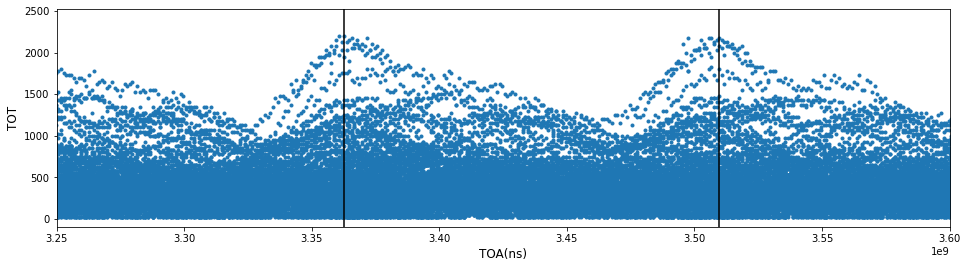

In [157]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25e9, 3.6e9)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")

In [49]:
# removing oscillating row
for i in range(1,9):
    globals()["just_row"+str(i)] = grid1_df.drop(grid1_df[(grid1_df['#Col'] > globals()["R"+str(i)+"max"]) | (grid1_df['#Col'] < globals()["R"+str(i)+"min"])].index)

just row1


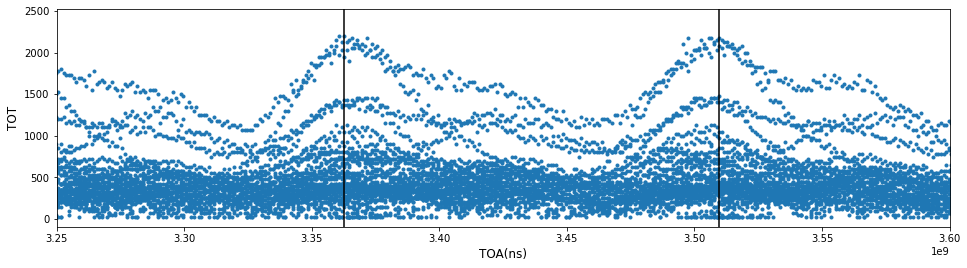

just row2


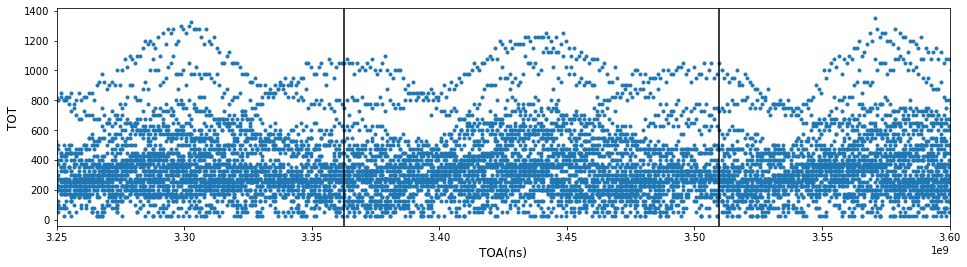

just row3


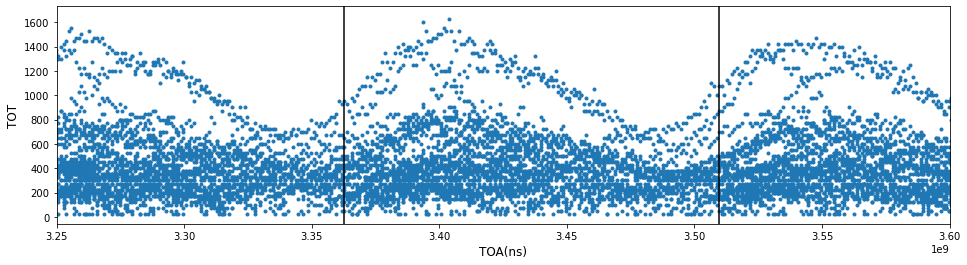

just row4


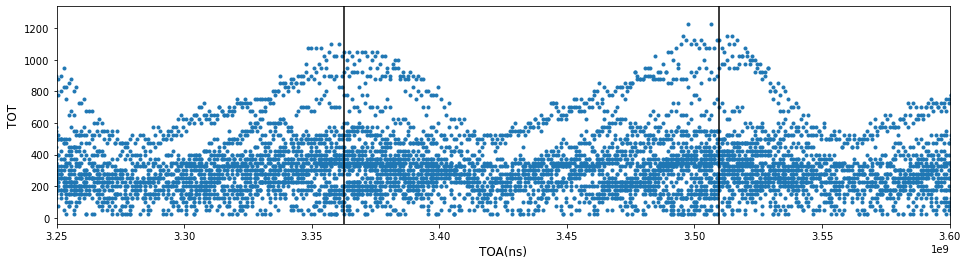

just row5


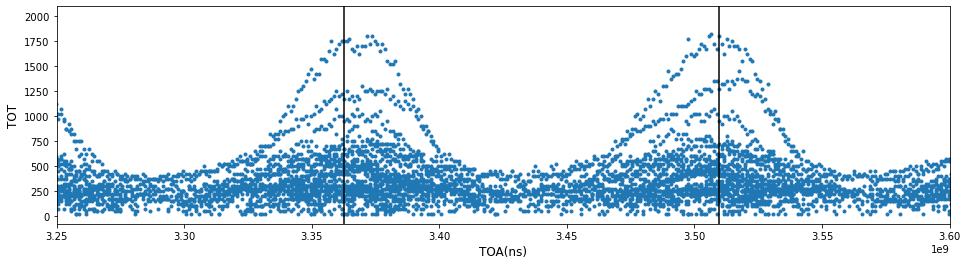

just row6


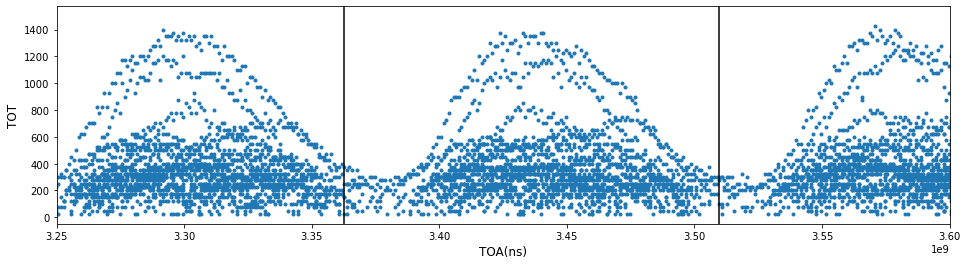

just row7


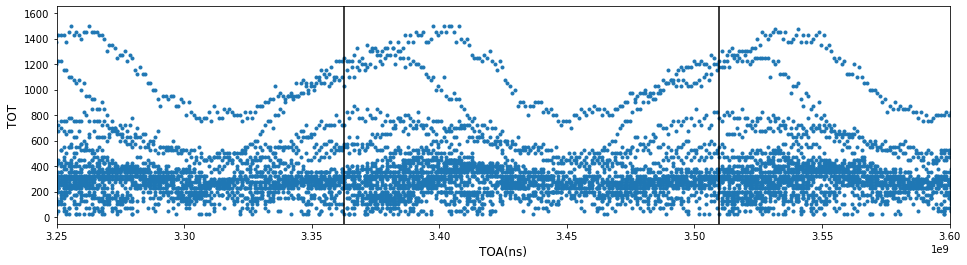

just row8


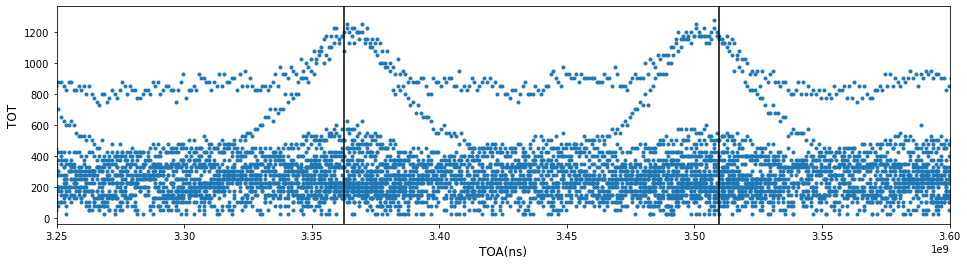

In [50]:
for i in range(1,9):
    print("just row"+str(i))
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(globals()["just_row"+str(i)]['#ToA']/4096.*25.,globals()["just_row"+str(i)]['#ToT[arb]'], '.')
    #plt.title("TOT", fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
    plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    # plt.xlim(963691753.125-50, 963691753.125+250)
    plt.xlim(3.25e9, 3.6e9)
    # plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
    time.ctime()
    plt.show()
    plt.close()
    # print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")

In [51]:
# removing oscillating row
for i in range(1,9):
    globals()["minus_row"+str(i)] = grid1_df.drop(grid1_df[(grid1_df['#Col'] < globals()["R"+str(i)+"max"]) & (grid1_df['#Col'] > globals()["R"+str(i)+"min"])].index)

without row1


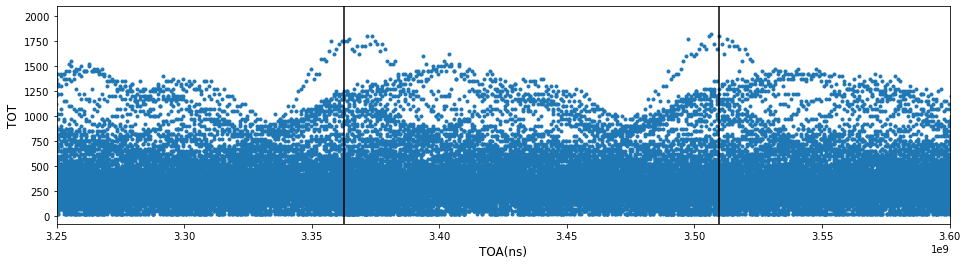

without row2


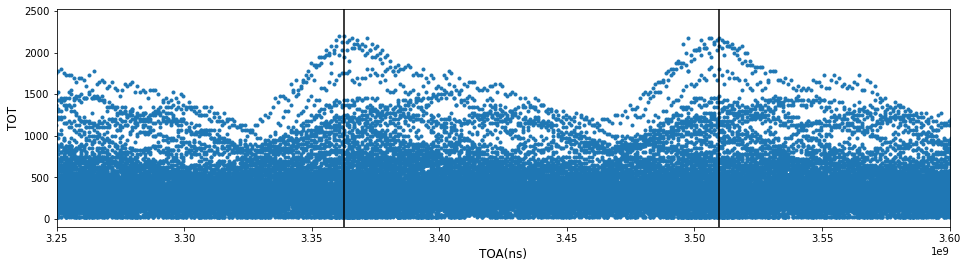

without row3


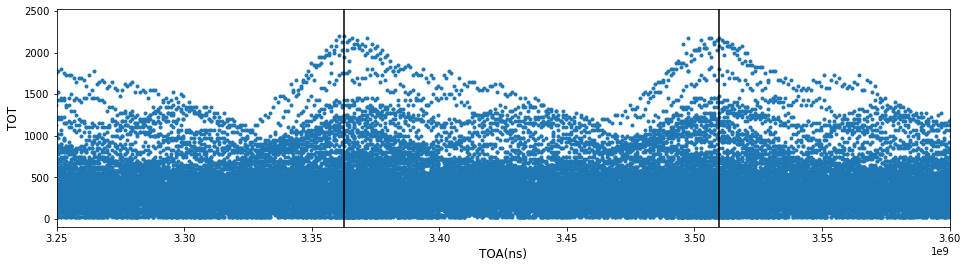

without row4


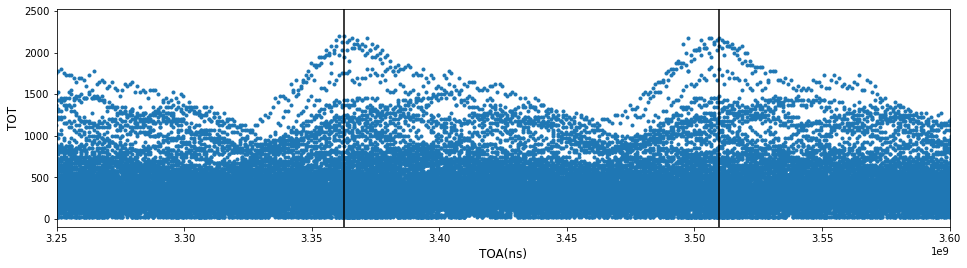

without row5


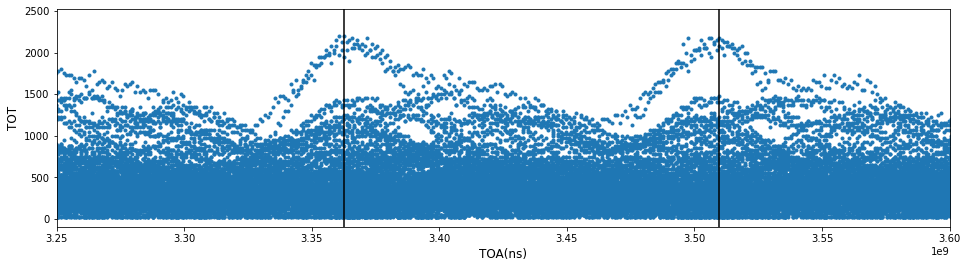

without row6


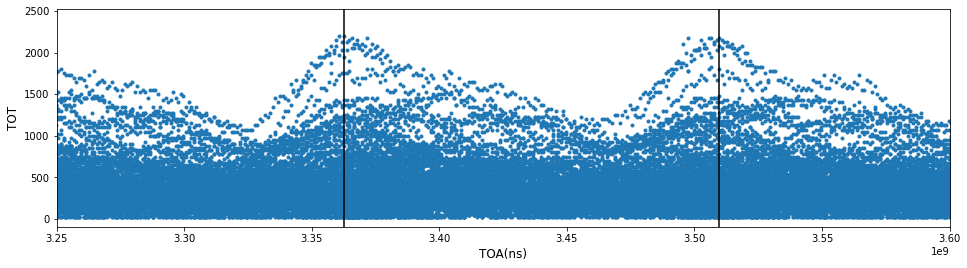

without row7


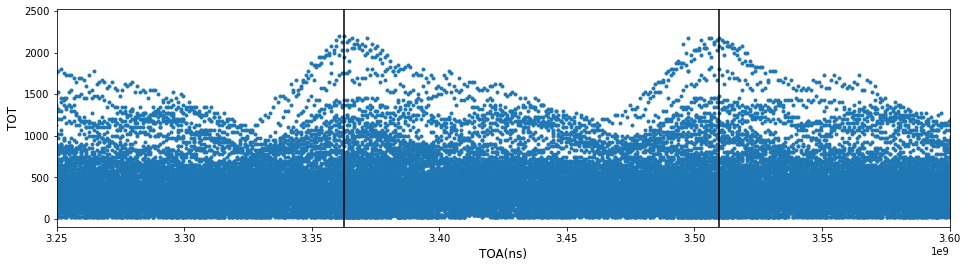

without row8


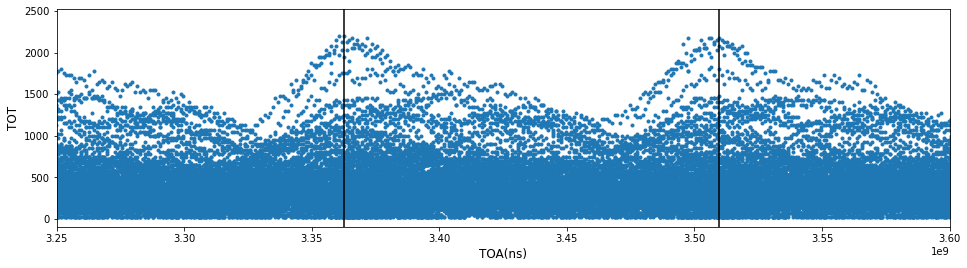

In [52]:
for i in range(1,9):
    print("without row"+str(i))
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(globals()["minus_row"+str(i)]['#ToA']/4096.*25.,globals()["minus_row"+str(i)]['#ToT[arb]'], '.')
    #plt.title("TOT", fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
    plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    # plt.xlim(963691753.125-50, 963691753.125+250)
    plt.xlim(3.25e9, 3.6e9)
    # plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
    time.ctime()
    plt.show()
    plt.close()
    # print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")

In [53]:
# removing oscillating col
for i in range(1,9):
    globals()["just_col"+str(i)] = grid1_df.drop(grid1_df[(grid1_df['#Row'] > globals()["C"+str(i)+"max"]) | (grid1_df['#Row'] < globals()["C"+str(i)+"min"])].index)

just col1


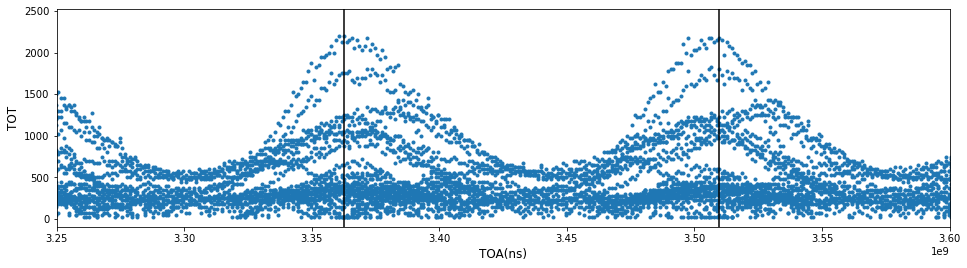

just col2


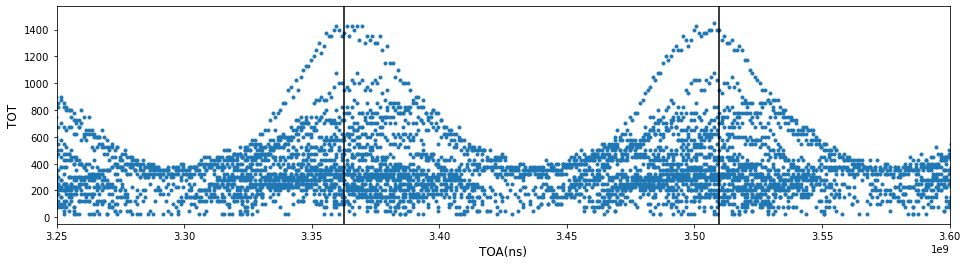

just col3


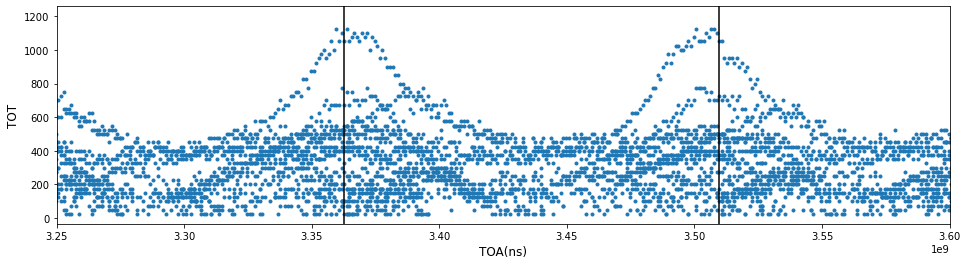

just col4


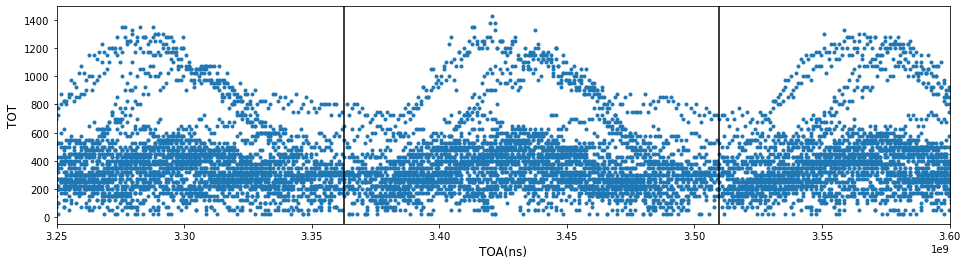

just col5


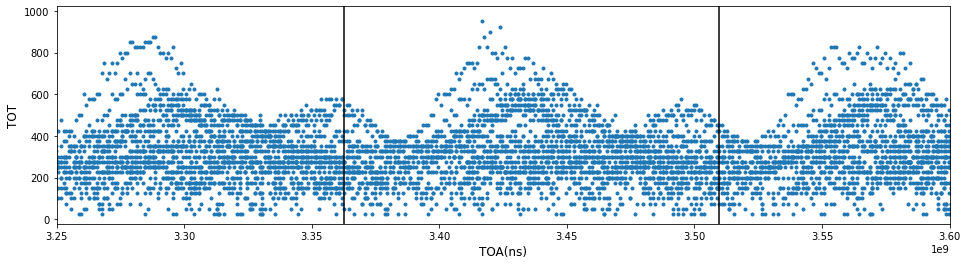

just col6


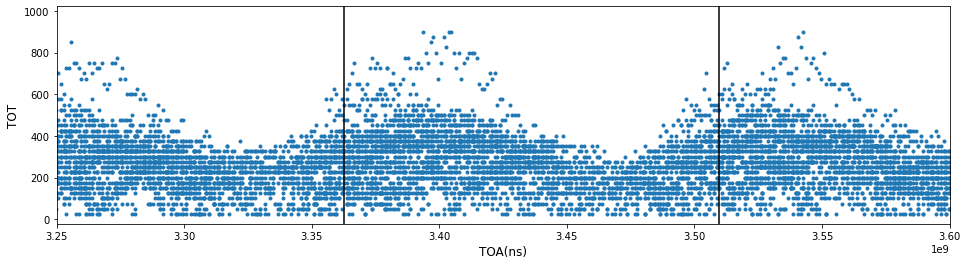

just col7


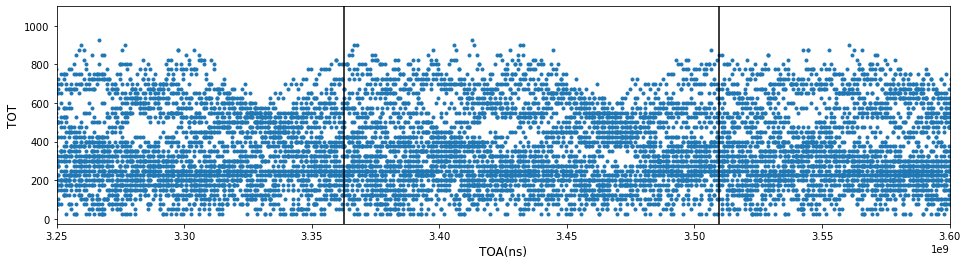

just col8


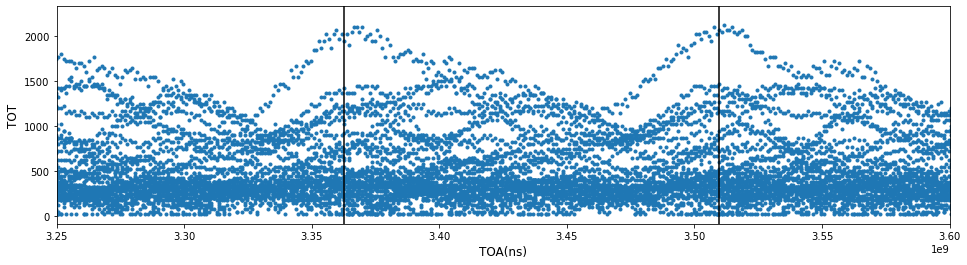

In [58]:
for i in range(1,9):
    print("just col"+str(i))
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(globals()["just_col"+str(i)]['#ToA']/4096.*25.,globals()["just_col"+str(i)]['#ToT[arb]'], '.')
    #plt.title("TOT", fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
    plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    # plt.xlim(963691753.125-50, 963691753.125+250)
    plt.xlim(3.25e9, 3.6e9)
    # plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
    time.ctime()
    plt.show()
    plt.close()
    # print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")

In [55]:
# removing oscillating col
for i in range(1,9):
    globals()["minus_col"+str(i)] = grid1_df.drop(grid1_df[(grid1_df['#Row'] < globals()["C"+str(i)+"max"]) & (grid1_df['#Row'] > globals()["C"+str(i)+"min"])].index)

without col1


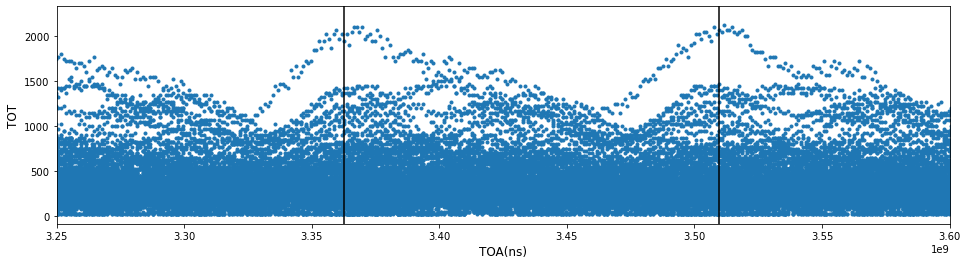

without col2


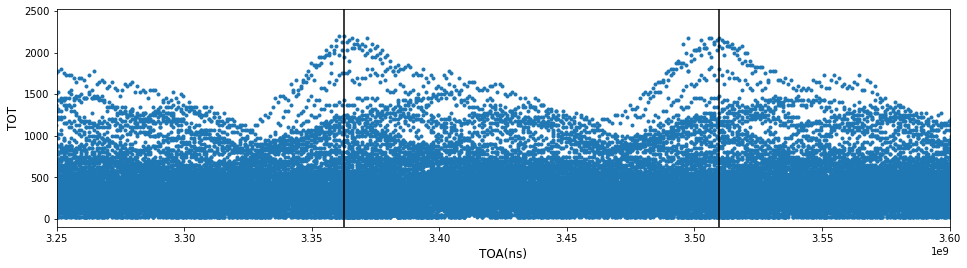

without col3


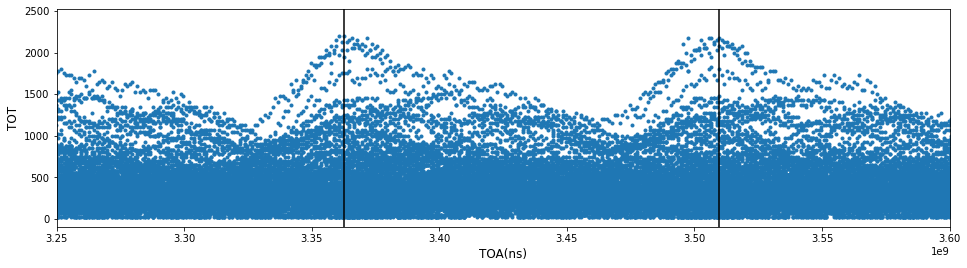

without col4


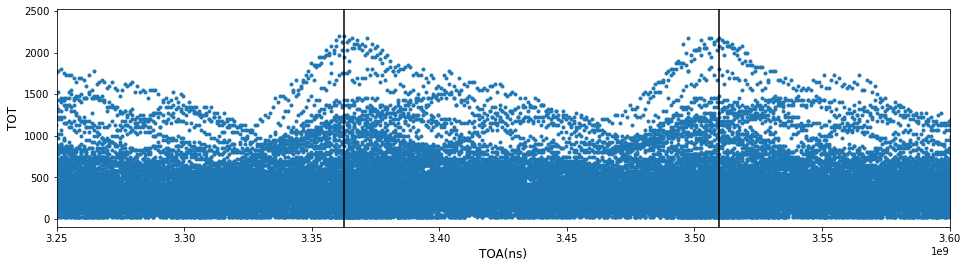

without col5


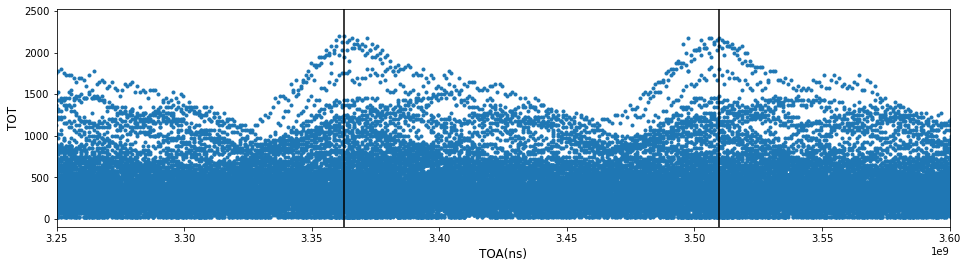

without col6


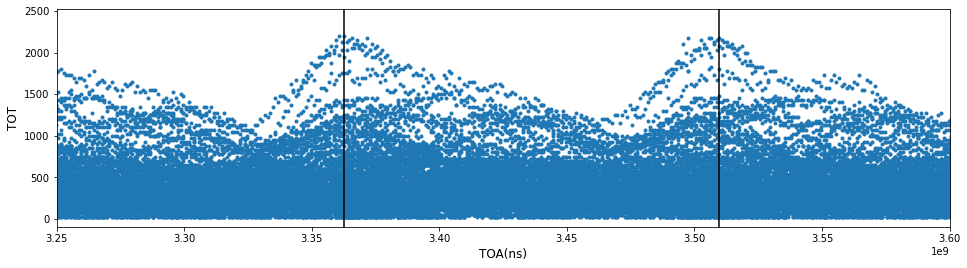

without col7


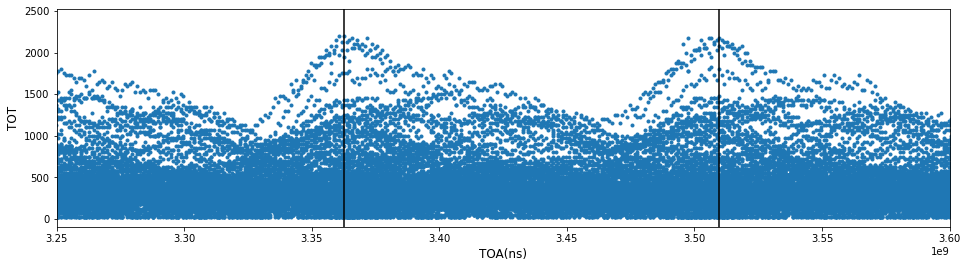

without col8


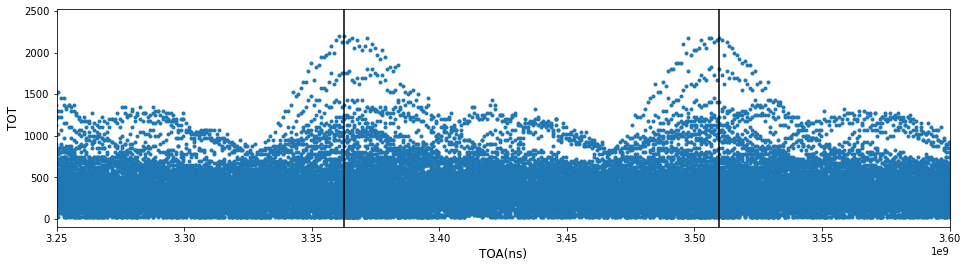

In [57]:
for i in range(1,9):
    print("without col"+str(i))
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(globals()["minus_col"+str(i)]['#ToA']/4096.*25.,globals()["minus_col"+str(i)]['#ToT[arb]'], '.')
    #plt.title("TOT", fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
    plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
    # plt.xlim(963691753.125-50, 963691753.125+250)
    plt.xlim(3.25e9, 3.6e9)
    # plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
    time.ctime()
    plt.show()
    plt.close()
    # print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")